In [1]:
# Criado pelo cientista Felipe Gollino (felipe.gollino@itau-unibanco.com.br), 
# qualquer dúvida podem nos procurar: Silvia Azevedo do Santos Cucatti (paula.cucatti@itau-unibanco.com.br) ou Paula Kintschev Santana de Moraes (paula.kintschev@itau-unibanco.com.br)

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))
display(HTML('<style>.output_result { max-width:100% !important; }</style>'))

pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 200

__PROBLEMA!!!__

Overview
The data has been split into two groups:

* training set (train.csv)
* test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Data Dictionary

|Variable| Definition| Key|
|-|-|-|
|survival| Survival| 0 = No, 1 = Yes|
|pclass| Ticket class| 1 = 1st, 2 = 2nd, 3 = 3rd|
|sex| Sex| |
|Age| Age in years| |
|sibsp| # of siblings / spouses aboard the Titanic| |
|parch| # of parents / children aboard the Titanic| |	
|ticket| Ticket number|	|
|fare| Passenger fare| |
|cabin| Cabin number| |
|embarked| Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton|

Variable Notes
pclass: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

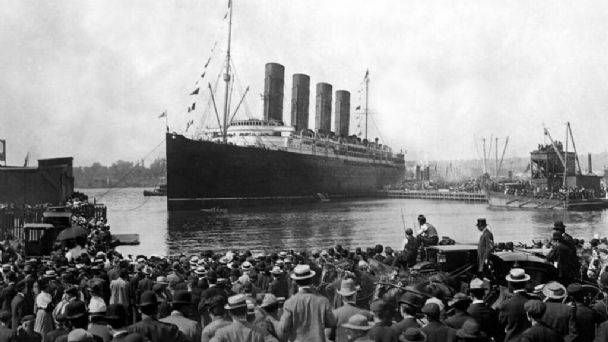

__Um pouco de historia para começarmos__

O RMS Titanic era um navio de passageiros britânico operado pela White Star Line que naufragou no Oceano Atlântico Norte nas primeiras horas da manhã de 15 de abril de 1912, após colidir com um iceberg durante sua viagem inaugural de Southampton para a cidade de Nova York. Dos cerca de 2.224 passageiros e tripulantes a bordo, mais de 1.500 morreram, tornando o naufrágio um dos mais mortíferos desastres marítimos comerciais em tempos de paz da história moderna. O RMS Titanic era o maior navio na época em que ela entrou em serviço e foi o segundo de três transatlânticos da classe olímpica operados pela White Star Line. Foi construído pelo estaleiro Harland and Wolff em Belfast. Thomas Andrews, arquiteto-chefe naval do estaleiro na época, morreu no desastre.

O Titanic estava sob o comando do Capitão Edward Smith, que também afundou com o navio. O transatlântico transportou algumas das pessoas mais ricas do mundo, bem como centenas de emigrantes da Grã-Bretanha e Irlanda, Escandinávia e de outros lugares da Europa, que buscavam uma nova vida nos Estados Unidos. A acomodação de primeira classe foi projetada para ser o auge do conforto e luxo, com um ginásio, piscina, bibliotecas, restaurantes de alta classe e cabines opulentas. Um transmissor radiotelégrafo de alta potência estava disponível para enviar "marconigramas" aos passageiros e para uso operacional do navio. 

Depois de deixar Southampton em 10 de abril de 1912, o Titanic fez escala em Cherbourg, na França, e em Queenstown (agora Cobh), na Irlanda, antes de seguir para o oeste para Nova York. Às 23h40 (hora do navio) no dia 14 de abril, quatro dias após o início da travessia e cerca de 375 milhas (600 km) ao sul de Newfoundland, o vigia Frederick Fleet avistou um iceberg imediatamente à frente do Titanic e alertou a ponte. O primeiro oficial William Murdoch ordenou que o navio fosse o obstáculo contornado e os motores parados, mas já era tarde. O lado estibordo (lado direito de quem se encontra numa embarcação, voltado para a sua proa, parte da frente) do Titanic atingiu o iceberg, criando uma série de buracos abaixo da linha de água. O casco não foi perfurado pelo iceberg, mas sim amassado de forma que as costuras do casco se dobraram e se separaram, permitindo que a água se infiltrasse. Os compartimentos estanques do navio foram violados e logo ficou claro que o navio estava condenado, pois ela não poderia sobreviver a mais de quatro compartimentos sendo inundados. O Titanic começou a afundar com a proa, com água derramando de compartimento em compartimento conforme seu ângulo na água se tornava mais íngreme.

Os que estavam a bordo do Titanic não estavam preparados para tal emergência. De acordo com as práticas aceitas da época, como os navios eram vistos como praticamente impossíveis de afundar e os botes salva-vidas se destinavam a transferir passageiros para embarcações de resgate próximas, embora o Titanic tivesse recursos de segurança avançados, como compartimentos estanques e portas estanques ativadas remotamente, ele transportava apenas botes salva-vidas suficientes para 1.178 pessoas, cerca de metade do número a bordo e um terço da regulamentada pela segurança marítima daqueles dias. A tripulação não foi treinada adequadamente para realizar uma evacuação. Os oficiais não sabiam quantos eles poderiam colocar com segurança a bordo dos botes salva-vidas e lançaram muitos deles mal cheios pela metade. Os passageiros da terceira classe foram em grande parte deixados à própria sorte, fazendo com que muitos deles ficassem presos abaixo do convés enquanto o navio enchia de água. O protocolo "mulheres e crianças primeiro" era geralmente seguido ao carregar os botes salva-vidas, e a maioria dos passageiros e tripulantes do sexo masculino eram deixados a bordo.

Entre 2h10 e 2h15, um pouco mais de duas horas e meia depois que o Titanic atingiu o iceberg, sua taxa de naufrágio aumentou repentinamente conforme o convés do barco afundava e o mar entrava por escotilhas e grades abertas. Quando sua popa sem apoio se ergueu da água, expondo as hélices, o navio se partiu em duas peças principais entre o segundo e o terceiro funis, devido às imensas forças na quilha. Com a proa submersa e o ar preso na popa, a popa permaneceu flutuando por mais alguns minutos, subindo para um ângulo quase vertical com centenas de pessoas ainda agarradas a ela, antes de afundar às 2h20 Por muito tempo, geralmente se acreditou que o navio afundou inteiro; mas a descoberta do naufrágio muitos anos depois revelou que o navio se partiu totalmente em dois. Todos os passageiros e tripulantes restantes foram imersos em água letalmente fria com temperatura de 28 ° F (-2 ° C). A imersão repentina em água gelada geralmente causa a morte em minutos, seja por parada cardíaca, respiração incontrolável de água ou incapacitação pelo frio (não, como comumente se acredita, por hipotermia), e quase todos aqueles na água morreram de parada cardíaca ou outras reações corporais à água congelada, dentro de 15–30 minutos. Apenas cinco deles foram ajudados a entrar nos botes salva-vidas.

Fonte: https://en.wikipedia.org/wiki/Titanic

__Números oficiais__

|Age/sex|Class/crew|Number aboard|Number saved|Number lost|Percentage saved|Percentage lost|
|-|-|-|-|-|-|-|
|Children|First Class|6|5|1|83%|17%|
||Second Class|24|24|0|100%|0%|
||Third Class|79|27|52|34%|66%|
|Men|First Class|175|57|118|33%|67%|
||Second Class|168|14|154|8%|92%|
||Third Class|462|75|387|16%|84%|
||Crew|885|192|693|22%|78%|
|Women|First Class|144|140|4|97%|3%|
||Second Class|93|80|13|86%|14%|
||Third Class|165|76|89|46%|54%|
||Crew|23|20|3|87%|13%|
|Total||2224|710|1514|32%|68|

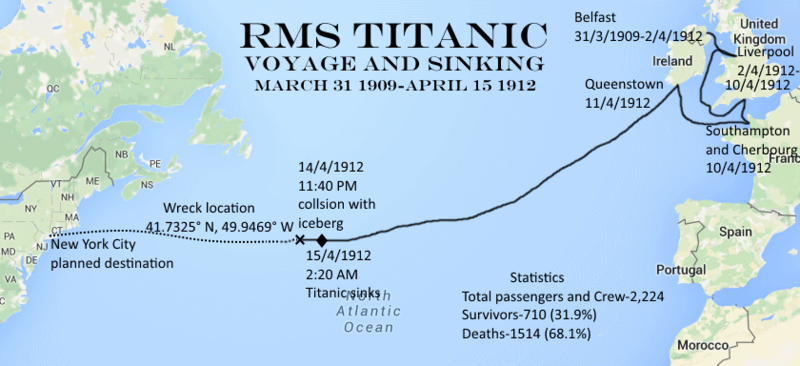

In [3]:
train_orig = pd.read_csv('Titanic_Machine_Learning_for_Disaster/train.csv')
test_orig  = pd.read_csv('Titanic_Machine_Learning_for_Disaster/test.csv')

In [4]:
print(train_orig.shape)
train_orig.head()

(891, 12)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
print(test_orig.shape)
test_orig.head()

(418, 11)


PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [6]:
db_orig = pd.concat([train_orig, test_orig])
print(db_orig.shape)
db_orig.head(10)

(1309, 12)


PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   
5            6       0.0       3   
6            7       0.0       1   
7            8       0.0       3   
8            9       1.0       3   
9           10       1.0       2   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [7]:
db_orig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


__Analisando as informações recebidas__

In [8]:
for i in db_orig.columns:
    print(i)
    print(db_orig[i].value_counts().head())
    print('únicos:', db_orig[i].nunique())
    print('-'*50)

PassengerId
1309    1
449     1
431     1
432     1
433     1
Name: PassengerId, dtype: int64
únicos: 1309
--------------------------------------------------
Survived
0.0    549
1.0    342
Name: Survived, dtype: int64
únicos: 2
--------------------------------------------------
Pclass
3    709
1    323
2    277
Name: Pclass, dtype: int64
únicos: 3
--------------------------------------------------
Name
Connolly, Miss. Kate           2
Kelly, Mr. James               2
Futrelle, Mr. Jacques Heath    1
Gill, Mr. John William         1
Peter, Miss. Anna              1
Name: Name, dtype: int64
únicos: 1307
--------------------------------------------------
Sex
male      843
female    466
Name: Sex, dtype: int64
únicos: 2
--------------------------------------------------
Age
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
Name: Age, dtype: int64
únicos: 98
--------------------------------------------------
SibSp
0    891
1    319
2     42
4     22
3     20
Name: SibSp, dtype: int64
ú

__Devemos usar todos os dados disponiveis?__

In [9]:
db_orig.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
db_orig.describe()

PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061    0.486592     0.837836    14.413493     1.041658   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
25%     328.000000    0.000000     2.000000    21.000000     0.000000   
50%     655.000000    0.000000     3.000000    28.000000     0.000000   
75%     982.000000    1.000000     3.000000    39.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200

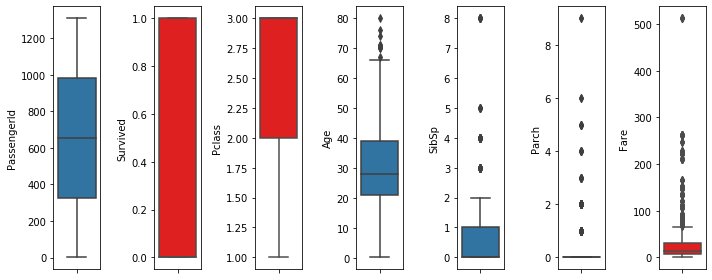

In [11]:
f, axes = plt.subplots(1, 7, figsize=(10,4))
sns.boxplot(x="PassengerId", data=db_orig, orient='v', ax=axes[0]) # id
sns.boxplot(x="Survived", data=db_orig, orient='v', ax=axes[1], color='red') # target e somente existem 2  valores discretos
sns.boxplot(x="Pclass", data=db_orig, orient='v', ax=axes[2], color='red') # somente existem 3 valores discretos
sns.boxplot(x="Age", data=db_orig, orient='v', ax=axes[3]) # distribuição continua
sns.boxplot(x="SibSp", data=db_orig, orient='v', ax=axes[4])
sns.boxplot(x="Parch", data=db_orig, orient='v', ax=axes[5])
sns.boxplot(x="Fare", data=db_orig, orient='v', ax=axes[6], color='red') # muitos outliers
plt.tight_layout();

In [12]:
db_orig.describe(include=['O'])

Name   Sex    Ticket        Cabin Embarked
count                   1309  1309      1309          295     1307
unique                  1307     2       929          186        3
top     Connolly, Miss. Kate  male  CA. 2343  C23 C25 C27        S
freq                       2   843        11            6      914

In [13]:
db = db_orig.copy()

__IMPORTANTE: Qual a pergunta queremos responder?__

In [14]:
db.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

__Todas as variaveis são boas para entrar no nosso modelo? Se não, quais as variaveis devem ser escolhidas?__

__"PassengerId"?__

chave forte (indice único)

In [15]:
db.PassengerId.head(10)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: PassengerId, dtype: int64

In [16]:
db.set_index('PassengerId', inplace=True)

__"Name"?__

será que o nome tem alguma influencia sobre o que queremos descobrir? Mas e quem sabe o título dela, poderia ter favorecido de alguma forma?

In [17]:
db.Name.value_counts().head(10)

Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Futrelle, Mr. Jacques Heath                            1
Gill, Mr. John William                                 1
Peter, Miss. Anna                                      1
Thomas, Mrs. Alexander (Thamine Thelma")"              1
Finoli, Mr. Luigi                                      1
Lindell, Mrs. Edvard Bengtsson (Elin Gerda Persson)    1
Rugg, Miss. Emily                                      1
Case, Mr. Howard Brown                                 1
Name: Name, dtype: int64

In [18]:
db['Title'] = [i.split('.')[0].split(',')[1].strip() for i in db.Name]

In [19]:
db.head()

Survived  Pclass  \
PassengerId                     
1                 0.0       3   
2                 1.0       1   
3                 1.0       3   
4                 1.0       1   
5                 0.0       3   

                                                            Name     Sex  \
PassengerId                                                                
1                                        Braund, Mr. Owen Harris    male   
2            Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female   
3                                         Heikkinen, Miss. Laina  female   
4                   Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
5                                       Allen, Mr. William Henry    male   

              Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
PassengerId                                                                 
1            22.0      1      0         A/5 21171   7.2500   NaN        S   
2            38.0      1      0          PC 17599  71.2833   C85        C   
3            26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
4            35.0      1      0            113803  53.1000  C123        S   
5            35.0      0      0            373450   8.0500   NaN        S   

            Title  
PassengerId        
1              Mr  
2             Mrs  
3            Miss  
4             Mrs  
5              Mr

In [20]:
db.Title.value_counts() / db.shape[0] * 100

Mr              57.830405
Miss            19.862490
Mrs             15.049656
Master           4.660046
Dr               0.611154
Rev              0.611154
Col              0.305577
Ms               0.152788
Mlle             0.152788
Major            0.152788
Mme              0.076394
the Countess     0.076394
Capt             0.076394
Sir              0.076394
Jonkheer         0.076394
Lady             0.076394
Don              0.076394
Dona             0.076394
Name: Title, dtype: float64

* Mr = Senhor, homem sem título de nobreza. 
* Miss = Senhorita, mulher jovem ou não casada.
* Mrs = Senhora, mulher mais velha ou casada.
* Master = Mestre, menino ou homem jovem.
* Dr = Doutor, pessoa que obteve um doutorado ou médicos.
* Rev = Reverendo, ministros da maioria das denominações cristãs.
* Col = Coronel, um ranque oficial militar abaixo de general.
* Mlle = Mademoiselle, título francês de cortesia para mulher solteira. O equivalente a "Senhorita" em inglês.
* Major = Major, posto militar com status de oficial comissionado.
* Ms = Senhorita, forma padrão de destinada a mulheres, independentemente do estado civil.
* Don = Don, é usado de forma honorífica quando se dirige a um cidadão idoso ou monarca em países latinos.
* Jonkheer = Jonkheer é um título honorífico nos Países Baixos, denotando o posto mais baixo dentro da nobreza.
* Mme = Madame, título francês de cortesia para mulher.
* Dona = feminino de Don.
* Capt = Capitão, título para o comandante de uma unidade militar.
* Sir = Sir, titulo honorífico inglês para homens que realizaram um feito notável.
* the Countess = feminino de conde.
* Lady = título de nobreza ou honorário para a esposa de um nobre inglês.

In [21]:
db.Title.replace('Ms', 'Miss', inplace=True)
db.Title.replace('Mlle', 'Miss', inplace=True)
db.Title.replace('Mme', 'Mrs', inplace=True)

db.Title.replace('Dr', 'rare', inplace=True)
db.Title.replace('Rev', 'rare', inplace=True)
db.Title.replace('Col', 'rare', inplace=True)
db.Title.replace('Major', 'rare', inplace=True)
db.Title.replace('Don', 'rare', inplace=True)
db.Title.replace('Jonkheer', 'rare', inplace=True)
db.Title.replace('Dona', 'rare', inplace=True)
db.Title.replace('Capt', 'rare', inplace=True)
db.Title.replace('Sir', 'rare', inplace=True)
db.Title.replace('the Countess', 'rare', inplace=True)
db.Title.replace('Lady', 'rare', inplace=True)

In [22]:
db.Title.value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
rare       29
Name: Title, dtype: int64

In [23]:
db[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived').style.background_gradient(cmap='Blues')

__Label Enconding ou One-Hot Enconding?__

In [24]:
aux_title = pd.get_dummies(db.Title, prefix='Title')
aux_title.head()

Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_rare
PassengerId                                                           
1                       0           0         1          0           0
2                       0           0         0          1           0
3                       0           1         0          0           0
4                       0           0         0          1           0
5                       0           0         1          0           0

In [25]:
db = db.join(aux_title)
db.drop('Title', axis=1, inplace=True)
db.drop('Name', axis=1, inplace=True)

In [26]:
print(db.shape)
db.head()

(1309, 15)


Survived  Pclass     Sex   Age  SibSp  Parch            Ticket  \
PassengerId                                                                   
1                 0.0       3    male  22.0      1      0         A/5 21171   
2                 1.0       1  female  38.0      1      0          PC 17599   
3                 1.0       3  female  26.0      0      0  STON/O2. 3101282   
4                 1.0       1  female  35.0      1      0            113803   
5                 0.0       3    male  35.0      0      0            373450   

                Fare Cabin Embarked  Title_Master  Title_Miss  Title_Mr  \
PassengerId                                                               
1             7.2500   NaN        S             0           0         1   
2            71.2833   C85        C             0           0         0   
3             7.9250   NaN        S             0           1         0   
4            53.1000  C123        S             0           0         0   
5             8.0500   NaN        S             0           0         1   

             Title_Mrs  Title_rare  
PassengerId                         
1                    0           0  
2                    1           0  
3                    0           0  
4                    1           0  
5                    0           0

__"Ticket"?__

In [27]:
db.Ticket.value_counts().head(10) # será que é relevante o número do bilhete?

CA. 2343        11
1601             8
CA 2144          8
PC 17608         7
S.O.C. 14879     7
347082           7
347077           7
3101295          7
347088           6
382652           6
Name: Ticket, dtype: int64

In [28]:
db.Ticket.nunique()

929

In [29]:
db.shape

(1309, 15)

In [30]:
db.drop('Ticket', axis=1, inplace=True)

__"Cabin"?__

In [31]:
db[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Cabin').style.background_gradient(cmap='Blues')

C:\Users\Felipe Gollino\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [32]:
print('dados faltantes {:.2f}%'.format((db.isna().sum().Cabin / db.shape[0]) * 100))

dados faltantes 77.46%


In [33]:
db.drop(['Cabin'], axis=1, inplace=True)

__"Sibsp" e "Parch"?__

In [34]:
aux_sibsp = db[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='SibSp')
x_h = aux_sibsp.SibSp.values
y_h = aux_sibsp.Survived.values

aux_sibsp.style.background_gradient(cmap='Blues')

In [35]:
aux_parch = db[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Parch')
x_v = aux_parch.Parch.values
y_v = aux_parch.Survived.values

aux_parch.style.background_gradient(cmap='Blues')

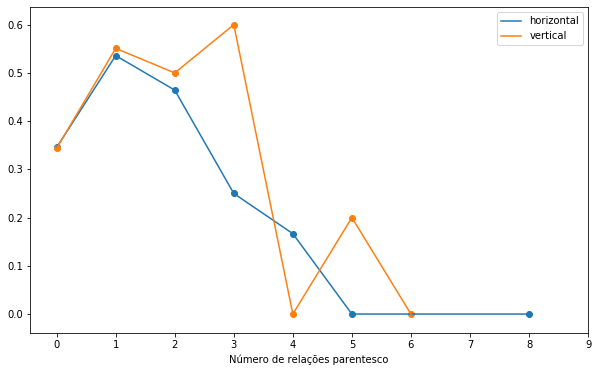

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(x_h, y_h)
plt.plot(x_h, y_h, label='horizontal')

plt.scatter(x_v, y_v)
plt.plot(x_v, y_v, label='vertical')

plt.xticks(np.arange(0, 10, step=1))
plt.legend()
plt.xlabel('Número de relações parentesco');

In [37]:
db['FamilySize'] = db.SibSp + db.Parch + 1
aux_familysize =  db[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='FamilySize')
aux_familysize.style.background_gradient(cmap='Blues')

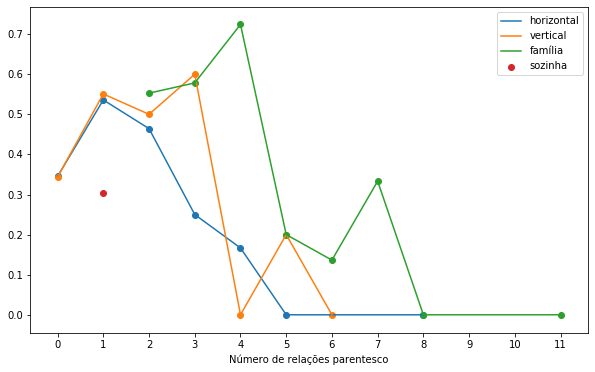

In [38]:
x_f = aux_familysize.FamilySize.values
y_f = aux_familysize.Survived.values

plt.figure(figsize=(10,6))
plt.scatter(x_h, y_h)
plt.plot(x_h, y_h, label='horizontal')

plt.scatter(x_v, y_v)
plt.plot(x_v, y_v, label='vertical')

plt.scatter(x_f[1:], y_f[1:])
plt.plot(x_f[1:], y_f[1:], label='família')

plt.scatter(x_f[0], y_f[0], label='sozinha')

plt.xticks(np.arange(0, 12, step=1))
plt.legend()
plt.xlabel('Número de relações parentesco');

In [39]:
db['IsAlone'] = 0
db.loc[db['FamilySize'] == 1, 'IsAlone'] = 1
db[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean().style.background_gradient(cmap='Blues')

__"Fare"?__

In [40]:
db.isna().sum()

Survived        418
Pclass            0
Sex               0
Age             263
SibSp             0
Parch             0
Fare              1
Embarked          2
Title_Master      0
Title_Miss        0
Title_Mr          0
Title_Mrs         0
Title_rare        0
FamilySize        0
IsAlone           0
dtype: int64

In [41]:
print('dados faltantes {:.2f}%'.format((db.isna().sum().Fare / db.shape[0]) * 100))

dados faltantes 0.08%


In [42]:
db.Fare.fillna(db.Fare.mode()[0], inplace=True)

__O que poderia alterar o valor do passagem?__

O porto de saida? o classe? o tamanho da familia?

In [43]:
db[['Embarked', 'Pclass', 'FamilySize', 'Fare', 'Survived']].groupby(['Embarked', 'Pclass', 'FamilySize'], as_index=False)[['Fare', 'Survived']].mean().sort_values(by='Survived').style.background_gradient(cmap='Blues')

In [44]:
nCut = 4
cuts = pd.DataFrame({'Fare_'+str(pclass): pd.qcut(db.Fare.loc[db.Pclass == pclass], nCut) for pclass in [1, 2, 3]})

In [45]:
for i in cuts.columns:
    print(i)
    print(cuts[i].value_counts().sort_index())
    print('-'*50)

Fare_1
(-0.001, 30.696]      82
(30.696, 60.0]        80
(60.0, 107.662]       80
(107.662, 512.329]    81
Name: Fare_1, dtype: int64
--------------------------------------------------
Fare_2
(-0.001, 13.0]    120
(13.0, 15.046]     21
(15.046, 26.0]     76
(26.0, 73.5]       60
Name: Fare_2, dtype: int64
--------------------------------------------------
Fare_3
(-0.001, 7.75]     196
(7.75, 8.05]       212
(8.05, 15.246]     132
(15.246, 69.55]    169
Name: Fare_3, dtype: int64
--------------------------------------------------


In [46]:
db.loc[(db.Pclass == 1) & (db.Fare <= 31), 'FareLabel'] = 0
db.loc[(db.Pclass == 1) & (db.Fare > 31) & (db.Fare <= 60), 'FareLabel'] = 1
db.loc[(db.Pclass == 1) & (db.Fare > 60) & (db.Fare <= 108), 'FareLabel'] = 2
db.loc[(db.Pclass == 1) & (db.Fare > 108), 'FareLabel'] = 3

db.loc[(db.Pclass == 2) & (db.Fare <= 13), 'FareLabel'] = 0
db.loc[(db.Pclass == 2) & (db.Fare > 13) & (db.Fare <= 15), 'FareLabel'] = 1
db.loc[(db.Pclass == 2) & (db.Fare > 14) & (db.Fare <= 26), 'FareLabel'] = 2
db.loc[(db.Pclass == 2) & (db.Fare > 26), 'FareLabel'] = 3

db.loc[(db.Pclass == 3) & (db.Fare <= 7), 'FareLabel'] = 0
db.loc[(db.Pclass == 3) & (db.Fare > 7) & (db.Fare <= 8), 'FareLabel'] = 1
db.loc[(db.Pclass == 3) & (db.Fare > 8) & (db.Fare <= 15), 'FareLabel'] = 2
db.loc[(db.Pclass == 3) & (db.Fare > 15), 'FareLabel'] = 3

In [47]:
db.drop(['Fare'], axis=1, inplace=True)

__"Embarked"?__

In [48]:
db.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [49]:
db[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Embarked').style.background_gradient(cmap='Blues')

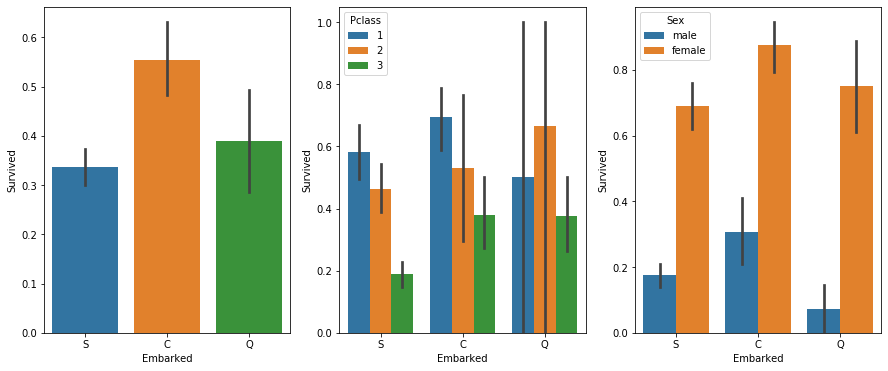

In [50]:
fig, ax = plt.subplots(1,3,figsize=(15,6))
sns.barplot(x='Embarked', y='Survived', data=db, ax=ax[0])
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=db, ax=ax[1])
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=db, ax=ax[2]);

In [51]:
db.Embarked.fillna(db.Embarked.mode()[0], inplace=True)

In [52]:
db.isna().sum()

Survived        418
Pclass            0
Sex               0
Age             263
SibSp             0
Parch             0
Embarked          0
Title_Master      0
Title_Miss        0
Title_Mr          0
Title_Mrs         0
Title_rare        0
FamilySize        0
IsAlone           0
FareLabel         0
dtype: int64

In [53]:
aux_embarked = pd.get_dummies(db.Embarked, prefix='Embarked')
aux_embarked.head()

Embarked_C  Embarked_Q  Embarked_S
PassengerId                                    
1                     0           0           1
2                     1           0           0
3                     0           0           1
4                     0           0           1
5                     0           0           1

In [54]:
db = db.join(aux_embarked)
db.drop(['Embarked'], axis=1, inplace=True)
db.head()

Survived  Pclass     Sex   Age  SibSp  Parch  Title_Master  \
PassengerId                                                               
1                 0.0       3    male  22.0      1      0             0   
2                 1.0       1  female  38.0      1      0             0   
3                 1.0       3  female  26.0      0      0             0   
4                 1.0       1  female  35.0      1      0             0   
5                 0.0       3    male  35.0      0      0             0   

             Title_Miss  Title_Mr  Title_Mrs  Title_rare  FamilySize  IsAlone  \
PassengerId                                                                     
1                     0         1          0           0           2        0   
2                     0         0          1           0           2        0   
3                     1         0          0           0           1        1   
4                     0         0          1           0           2        0   
5                     0         1          0           0           1        1   

             FareLabel  Embarked_C  Embarked_Q  Embarked_S  
PassengerId                                                 
1                  1.0           0           0           1  
2                  2.0           1           0           0  
3                  1.0           0           0           1  
4                  1.0           0           0           1  
5                  2.0           0           0           1

__"Sex"?__

In [55]:
db[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Sex').style.background_gradient(cmap='Blues')

In [56]:
db.Sex = db.Sex.map({'male':0, 'female':1})
db.head()

Survived  Pclass  Sex   Age  SibSp  Parch  Title_Master  \
PassengerId                                                            
1                 0.0       3    0  22.0      1      0             0   
2                 1.0       1    1  38.0      1      0             0   
3                 1.0       3    1  26.0      0      0             0   
4                 1.0       1    1  35.0      1      0             0   
5                 0.0       3    0  35.0      0      0             0   

             Title_Miss  Title_Mr  Title_Mrs  Title_rare  FamilySize  IsAlone  \
PassengerId                                                                     
1                     0         1          0           0           2        0   
2                     0         0          1           0           2        0   
3                     1         0          0           0           1        1   
4                     0         0          1           0           2        0   
5                     0         1          0           0           1        1   

             FareLabel  Embarked_C  Embarked_Q  Embarked_S  
PassengerId                                                 
1                  1.0           0           0           1  
2                  2.0           1           0           0  
3                  1.0           0           0           1  
4                  1.0           0           0           1  
5                  2.0           0           0           1

__"Age"?__

In [57]:
db[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Age').style.background_gradient(cmap='Blues')

C:\Users\Felipe Gollino\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [58]:
db.head()

Survived  Pclass  Sex   Age  SibSp  Parch  Title_Master  \
PassengerId                                                            
1                 0.0       3    0  22.0      1      0             0   
2                 1.0       1    1  38.0      1      0             0   
3                 1.0       3    1  26.0      0      0             0   
4                 1.0       1    1  35.0      1      0             0   
5                 0.0       3    0  35.0      0      0             0   

             Title_Miss  Title_Mr  Title_Mrs  Title_rare  FamilySize  IsAlone  \
PassengerId                                                                     
1                     0         1          0           0           2        0   
2                     0         0          1           0           2        0   
3                     1         0          0           0           1        1   
4                     0         0          1           0           2        0   
5                     0         1          0           0           1        1   

             FareLabel  Embarked_C  Embarked_Q  Embarked_S  
PassengerId                                                 
1                  1.0           0           0           1  
2                  2.0           1           0           0  
3                  1.0           0           0           1  
4                  1.0           0           0           1  
5                  2.0           0           0           1

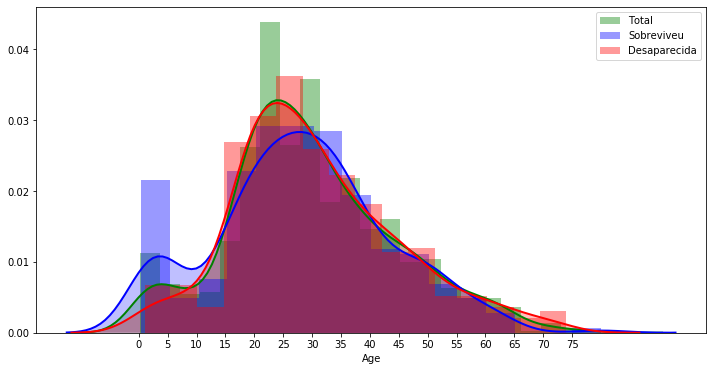

In [59]:
plt.figure(figsize=(12,6))
sns.distplot(db.Age, color='green', label='Total', kde_kws={'linewidth': 2, 'shade':True, 'linestyle':'solid'})
sns.distplot(db.Age.loc[db.Survived == 1], color='blue', label='Sobreviveu', kde_kws={'linewidth': 2, 'shade':True, 'linestyle':'solid'})
sns.distplot(db.Age.loc[db.Survived == 0], color='red', label='Desaparecida', kde_kws={'linewidth': 2, 'shade':True, 'linestyle':'solid'})
plt.xticks(np.arange(0, 80, step=5))
plt.legend();

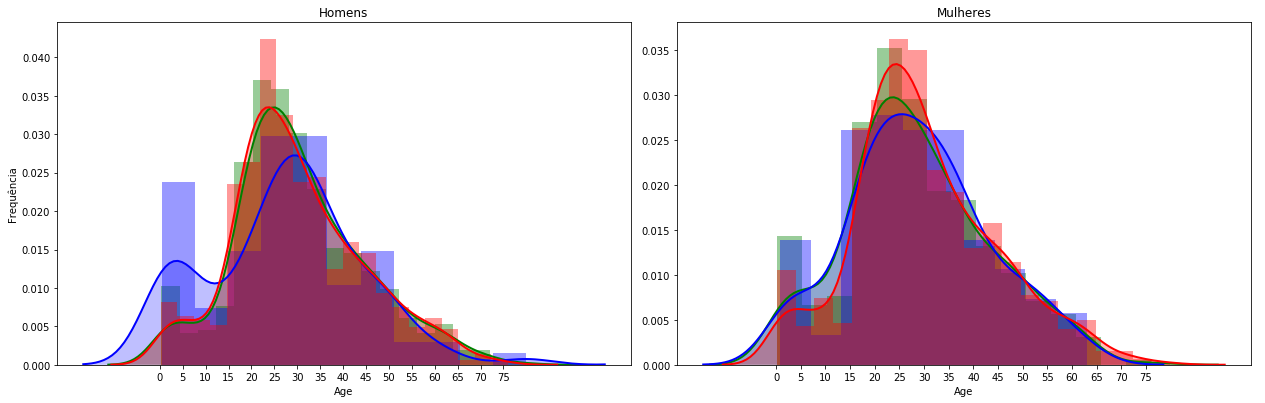

In [60]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111, frameon=False)
ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax1 = fig.add_subplot(121)

ax1.set_title('Homens')
sns.distplot(db.Age.loc[db.Sex == 0], color='green', label='Total', ax=ax1, kde_kws={'linewidth': 2, 'shade':True, 'linestyle':'solid'})
sns.distplot(db.Age.loc[(db.Sex == 0) & db.Survived == 1], color='blue', label='Sobreviveram', ax=ax1, kde_kws={'linewidth': 2, 'shade':True, 'linestyle':'solid'})
sns.distplot(db.Age.loc[(db.Sex == 0) & db.Survived == 0], color='red', label='Desaparecidas', ax=ax1, kde_kws={'linewidth': 2, 'shade':True, 'linestyle':'solid'})
ax1.set_xticks(np.arange(0, 80, step=5))

ax2 = fig.add_subplot(122)
ax2.set_title('Mulheres')
sns.distplot(db.Age.loc[db.Sex == 1], color='green', label='Total', ax=ax2, kde_kws={'linewidth': 2, 'shade':True, 'linestyle':'solid'})
sns.distplot(db.Age.loc[(db.Sex == 1) & db.Survived == 1], color='blue', label='Sobreviveram', ax=ax2, kde_kws={'linewidth': 2, 'shade':True, 'linestyle':'solid'})
sns.distplot(db.Age.loc[(db.Sex == 1) & db.Survived == 0], color='red', label='Desaparecidas', ax=ax2, kde_kws={'linewidth': 2, 'shade':True, 'linestyle':'solid'})
ax2.set_xticks(np.arange(0, 80, step=5))

plt.setp(ax1, ylabel='Frequência')
plt.tight_layout()
plt.show();

In [61]:
print('dados faltantes {:.2f}%'.format((db.isna().sum().Age / db.shape[0]) * 100))

dados faltantes 20.09%


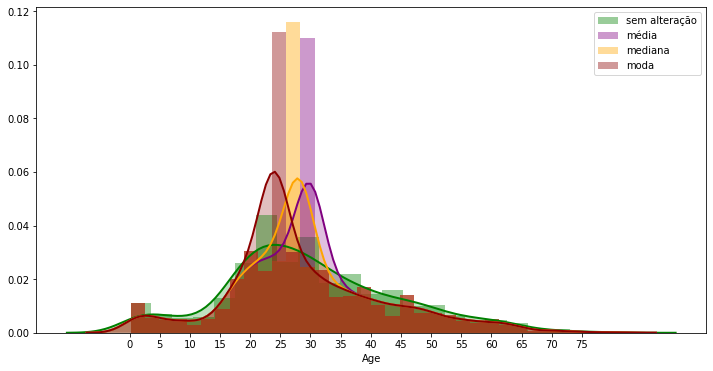

In [62]:
plt.figure(figsize=(12,6))
sns.distplot(db.Age, color='green', label='sem alteração', kde_kws={'linewidth': 2, 'shade':True, 'linestyle':'solid'})
sns.distplot(db.Age.fillna(db.Age.mean()), color='purple', label='média', kde_kws={'linewidth': 2, 'shade':True, 'linestyle':'solid'})
sns.distplot(db.Age.fillna(db.Age.median()), color='orange', label='mediana', kde_kws={'linewidth': 2, 'shade':True, 'linestyle':'solid'})
sns.distplot(db.Age.fillna(db.Age.mode()[0]), color='darkred', label='moda', kde_kws={'linewidth': 2, 'shade':True, 'linestyle':'solid'})
plt.xticks(np.arange(0, 80, step=5))
plt.legend()
plt.show();

In [63]:
db.head()

Survived  Pclass  Sex   Age  SibSp  Parch  Title_Master  \
PassengerId                                                            
1                 0.0       3    0  22.0      1      0             0   
2                 1.0       1    1  38.0      1      0             0   
3                 1.0       3    1  26.0      0      0             0   
4                 1.0       1    1  35.0      1      0             0   
5                 0.0       3    0  35.0      0      0             0   

             Title_Miss  Title_Mr  Title_Mrs  Title_rare  FamilySize  IsAlone  \
PassengerId                                                                     
1                     0         1          0           0           2        0   
2                     0         0          1           0           2        0   
3                     1         0          0           0           1        1   
4                     0         0          1           0           2        0   
5                     0         1          0           0           1        1   

             FareLabel  Embarked_C  Embarked_Q  Embarked_S  
PassengerId                                                 
1                  1.0           0           0           1  
2                  2.0           1           0           0  
3                  1.0           0           0           1  
4                  1.0           0           0           1  
5                  2.0           0           0           1

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def completing_age(df):
    df_age = df.drop('Survived', axis=1) # removendo o alvo principal 
    
    train_age = df_age.loc[df_age.Age.notnull()] ## df com valores em 'age'
    test_age = df_age.loc[df_age.Age.isnull()].drop('Age', axis=1) ## df sem valores em 'age'

    X = train_age.drop('Age', axis=1).values
    y = train_age.Age.values # determinando o novo alvo, a variavel 'age' em y
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=147)
#     regressor = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    regressor = LinearRegression(n_jobs=-1)
    regressor.fit(X_train, y_train)
    print('score: ', regressor.score(X_test, y_test))
    
    predicted_age = regressor.predict(test_age)
    
    df.loc[df.Age.isnull(), 'Age'] = predicted_age

    return df

db_age = db.copy()
db_newage = completing_age(db_age)

print('dados faltantes (ANTES): ', db.Age.isna().sum())
print('dados faltantes (DEPOIS): ', db_newage.Age.isna().sum())

score:  0.3504412093311221
dados faltantes (ANTES):  263
dados faltantes (DEPOIS):  0


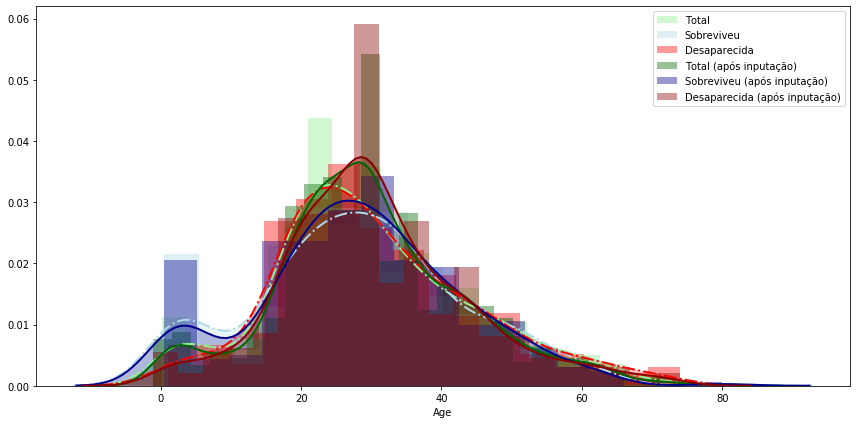

In [65]:
plt.figure(figsize=(12,6))
sns.distplot(db.Age, color='lightgreen', label='Total', kde_kws={'linewidth': 2, 'shade':True, 'linestyle':'dashdot'})
sns.distplot(db.Age.loc[db.Survived == 1], color='lightblue', label='Sobreviveu', kde_kws={'linewidth': 2, 'shade':True, 'linestyle':'dashdot'})
sns.distplot(db.Age.loc[db.Survived == 0], color='red', label='Desaparecida', kde_kws={'linewidth': 2, 'shade':True, 'linestyle':'dashdot'})
sns.distplot(db_newage.Age, color='darkgreen', label='Total (após inputação)', kde_kws={'linewidth': 2, 'shade':True, 'linestyle':'solid'})
sns.distplot(db_newage.Age.loc[db.Survived == 1], color='darkblue', label='Sobreviveu (após inputação)', kde_kws={'linewidth': 2, 'shade':True, 'linestyle':'solid'})
sns.distplot(db_newage.Age.loc[db.Survived == 0], color='darkred', label='Desaparecida (após inputação)', kde_kws={'linewidth': 2, 'shade':True, 'linestyle':'solid'})
plt.tight_layout()
plt.legend()
plt.show();

In [66]:
db = db_newage.copy()

In [67]:
db.loc[(db['Age'] <= 1, 'StageLife')] = 0 # infant
db.loc[(db['Age'] > 1) & (db['Age'] <= 4), 'StageLife'] = 1 # toddler
db.loc[(db['Age'] > 4) & (db['Age'] <= 12), 'StageLife'] = 2 # child
db.loc[(db['Age'] > 12) & (db['Age'] <= 19), 'StageLife'] = 3 # teenager
db.loc[(db['Age'] > 19) & (db['Age'] <= 39), 'StageLife'] = 4 # adult
db.loc[(db['Age'] > 39) & (db['Age'] <= 59), 'StageLife'] = 5 # middle age adult
db.loc[(db['Age'] > 59, 'StageLife')] = 6 # senior adult

In [68]:
# Antroposofia - Rudolf Steiner
db.loc[(db['Age'] <= 7, 'SevenYears')] = 0
db.loc[(db['Age'] > 7) & (db['Age'] <= 14), 'SevenYears'] = 1
db.loc[(db['Age'] > 14) & (db['Age'] <= 21), 'SevenYears'] = 2
db.loc[(db['Age'] > 21) & (db['Age'] <= 28), 'SevenYears'] = 3
db.loc[(db['Age'] > 28) & (db['Age'] <= 35), 'SevenYears'] = 4
db.loc[(db['Age'] > 35) & (db['Age'] <= 42), 'SevenYears'] = 5
db.loc[(db['Age'] > 42) & (db['Age'] <= 49), 'SevenYears'] = 6
db.loc[(db['Age'] > 49) & (db['Age'] <= 56), 'SevenYears'] = 7
db.loc[(db['Age'] > 56) & (db['Age'] <= 63), 'SevenYears'] = 8
db.loc[(db['Age'] > 63), 'SevenYears'] = 9

In [69]:
db.head()

Survived  Pclass  Sex   Age  SibSp  Parch  Title_Master  \
PassengerId                                                            
1                 0.0       3    0  22.0      1      0             0   
2                 1.0       1    1  38.0      1      0             0   
3                 1.0       3    1  26.0      0      0             0   
4                 1.0       1    1  35.0      1      0             0   
5                 0.0       3    0  35.0      0      0             0   

             Title_Miss  Title_Mr  Title_Mrs  Title_rare  FamilySize  IsAlone  \
PassengerId                                                                     
1                     0         1          0           0           2        0   
2                     0         0          1           0           2        0   
3                     1         0          0           0           1        1   
4                     0         0          1           0           2        0   
5                     0         1          0           0           1        1   

             FareLabel  Embarked_C  Embarked_Q  Embarked_S  StageLife  \
PassengerId                                                             
1                  1.0           0           0           1        4.0   
2                  2.0           1           0           0        4.0   
3                  1.0           0           0           1        4.0   
4                  1.0           0           0           1        4.0   
5                  2.0           0           0           1        4.0   

             SevenYears  
PassengerId              
1                   3.0  
2                   5.0  
3                   3.0  
4                   4.0  
5                   4.0

__Pclass?__

In [70]:
pv_pclass_sex = db.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean', margins=True, margins_name='media_total')
pv_pclass_sex.style.background_gradient(cmap='Blues') # pelos dados oficiais 32% foram salvos no tatal

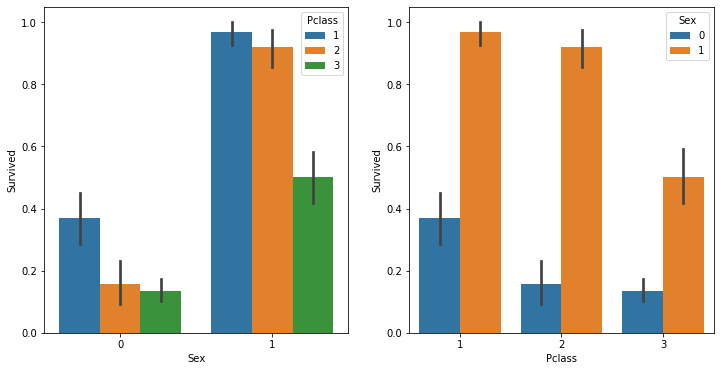

In [71]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

sns.barplot(x='Sex', y='Survived', hue='Pclass', data=db, ax=ax[0])

sns.barplot(x='Pclass', y='Survived', hue='Sex', data=db, ax=ax[1]);

__Será que conseguimos descobrir mais coisa?__

In [72]:
pd.DataFrame(db.corr()['Survived']).sort_values(by='Survived', ascending = False).style.background_gradient(cmap='Blues')

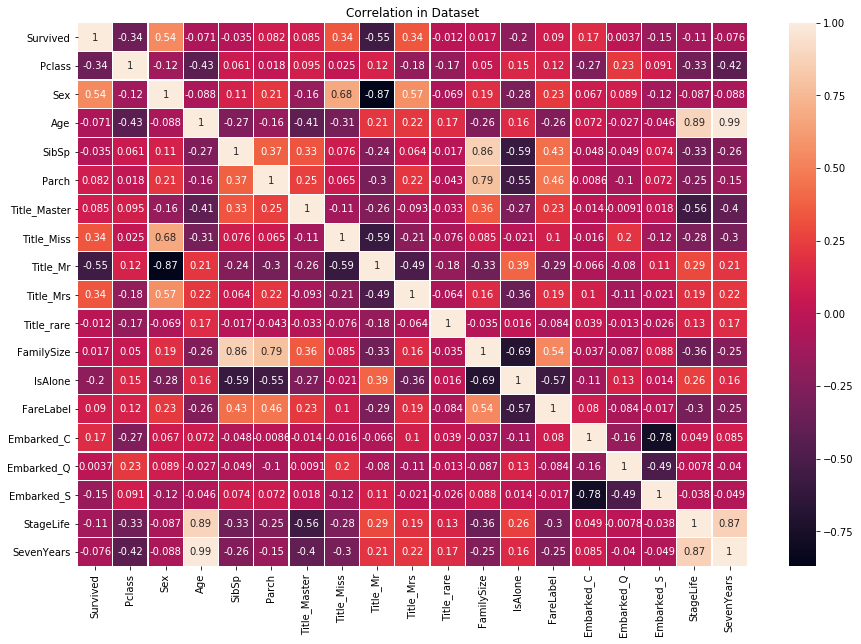

In [73]:
corr = db.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, linewidth = 0.2)
plt.title('Correlation in Dataset');

__Tudo pronto!!!... vamos começar a modelar \o/ (Ufaaa... finalmente!!!)__

In [74]:
db.isnull().sum()

Survived        418
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Title_Master      0
Title_Miss        0
Title_Mr          0
Title_Mrs         0
Title_rare        0
FamilySize        0
IsAlone           0
FareLabel         0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
StageLife         0
SevenYears        0
dtype: int64

In [75]:
train = db.loc[db.Survived.notnull()]
test = db.loc[db.Survived.isnull()]

In [76]:
train_orig.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [77]:
train.head()

Survived  Pclass  Sex   Age  SibSp  Parch  Title_Master  \
PassengerId                                                            
1                 0.0       3    0  22.0      1      0             0   
2                 1.0       1    1  38.0      1      0             0   
3                 1.0       3    1  26.0      0      0             0   
4                 1.0       1    1  35.0      1      0             0   
5                 0.0       3    0  35.0      0      0             0   

             Title_Miss  Title_Mr  Title_Mrs  Title_rare  FamilySize  IsAlone  \
PassengerId                                                                     
1                     0         1          0           0           2        0   
2                     0         0          1           0           2        0   
3                     1         0          0           0           1        1   
4                     0         0          1           0           2        0   
5                     0         1          0           0           1        1   

             FareLabel  Embarked_C  Embarked_Q  Embarked_S  StageLife  \
PassengerId                                                             
1                  1.0           0           0           1        4.0   
2                  2.0           1           0           0        4.0   
3                  1.0           0           0           1        4.0   
4                  1.0           0           0           1        4.0   
5                  2.0           0           0           1        4.0   

             SevenYears  
PassengerId              
1                   3.0  
2                   5.0  
3                   3.0  
4                   4.0  
5                   4.0

In [78]:
X = train.drop('Survived', axis=1)
y = train.Survived

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=147)
results = {}

In [80]:
X_train.head()

Pclass  Sex   Age  SibSp  Parch  Title_Master  Title_Miss  \
PassengerId                                                              
204               3    0  45.5      0      0             0           0   
112               3    1  14.5      1      0             0           1   
583               2    0  54.0      0      0             0           0   
176               3    0  18.0      1      1             0           0   
588               1    0  60.0      1      1             0           0   

             Title_Mr  Title_Mrs  Title_rare  FamilySize  IsAlone  FareLabel  \
PassengerId                                                                    
204                 1          0           0           1        1        1.0   
112                 0          0           0           2        0        2.0   
583                 1          0           0           1        1        2.0   
176                 1          0           0           3        0        1.0   
588                 1          0           0           3        0        2.0   

             Embarked_C  Embarked_Q  Embarked_S  StageLife  SevenYears  
PassengerId                                                             
204                   1           0           0        5.0         6.0  
112                   1           0           0        3.0         2.0  
583                   0           0           1        5.0         7.0  
176                   0           0           1        3.0         2.0  
588                   1           0           0        6.0         8.0

In [81]:
y_train.head()

PassengerId
204    0.0
112    0.0
583    0.0
176    0.0
588    1.0
Name: Survived, dtype: float64

In [82]:
X_val.head()

Pclass  Sex   Age  SibSp  Parch  Title_Master  Title_Miss  \
PassengerId                                                              
137               1    1  19.0      0      2             0           1   
857               1    1  45.0      1      1             0           0   
346               2    1  24.0      0      0             0           1   
620               2    0  26.0      0      0             0           0   
44                2    1   3.0      1      2             0           1   

             Title_Mr  Title_Mrs  Title_rare  FamilySize  IsAlone  FareLabel  \
PassengerId                                                                    
137                 0          0           0           3        0        0.0   
857                 0          1           0           3        0        3.0   
346                 0          0           0           1        1        0.0   
620                 1          0           0           1        1        0.0   
44                  0          0           0           4        0        3.0   

             Embarked_C  Embarked_Q  Embarked_S  StageLife  SevenYears  
PassengerId                                                             
137                   0           0           1        3.0         2.0  
857                   0           0           1        5.0         6.0  
346                   0           0           1        4.0         3.0  
620                   0           0           1        4.0         3.0  
44                    1           0           0        1.0         0.0

In [83]:
y_val.head()

PassengerId
137    1.0
857    1.0
346    1.0
620    0.0
44     1.0
Name: Survived, dtype: float64

In [84]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_std = ss.transform(X_train)
X_val_std = ss.transform(X_val)

__Logistic Regression__

É um algoritmo de classificação usado quando a variável de resposta é categórica. A ideia da Regressão Logística é encontrar uma relação entre as características e a probabilidade de um resultado específico.

In [85]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter = 500000)
lr_model.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_model, X_train_std, y_train, cv=10)
scores

array([0.88059701, 0.82089552, 0.80597015, 0.86567164, 0.80597015,
       0.82089552, 0.7761194 , 0.85074627, 0.84848485, 0.8030303 ])

In [87]:
X_train.head(2)

Pclass  Sex   Age  SibSp  Parch  Title_Master  Title_Miss  \
PassengerId                                                              
204               3    0  45.5      0      0             0           0   
112               3    1  14.5      1      0             0           1   

             Title_Mr  Title_Mrs  Title_rare  FamilySize  IsAlone  FareLabel  \
PassengerId                                                                    
204                 1          0           0           1        1        1.0   
112                 0          0           0           2        0        2.0   

             Embarked_C  Embarked_Q  Embarked_S  StageLife  SevenYears  
PassengerId                                                             
204                   1           0           0        5.0         6.0  
112                   1           0           0        3.0         2.0

In [88]:
X_train_std[0]

array([ 0.8198491 , -0.74396799,  1.14274701, -0.4770253 , -0.47986752,
       -0.22796601, -0.50327259,  0.86262699, -0.41959068, -0.16159725,
       -0.56106288,  0.82620799, -0.57290074,  2.06393859, -0.31125573,
       -1.60978193,  1.04897019,  1.17123964])

In [89]:
X_train_std[1]

array([ 0.8198491 ,  1.34414385, -1.11342427,  0.39839476, -0.47986752,
       -0.22796601,  1.98699475, -1.15924961, -0.41959068, -0.16159725,
        0.04539344, -1.21034898,  0.39350758,  2.06393859, -0.31125573,
       -1.60978193, -0.84229051, -0.89720207])

In [90]:
y_pred = lr_model.predict(X_val_std)
y_real = y_val.values

In [91]:
from sklearn.metrics import accuracy_score
results['LR'] = accuracy_score(y_real, y_pred)
accuracy_score(y_real, y_pred)

0.820627802690583

In [92]:
from sklearn.metrics import precision_score
precision_score(y_real, y_pred, average='macro')

0.8122522522522522

In [93]:
from sklearn.metrics import recall_score
recall_score(y_real, y_pred, average='macro')

0.7982788296041308

In [94]:
from sklearn.metrics import f1_score
f1_score(y_real, y_pred, average='macro')

0.8039732770745429

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_real, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       140
         1.0       0.79      0.71      0.75        83

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_real, y_pred)

array([[124,  16],
       [ 24,  59]], dtype=int64)

In [97]:
y_pred

array([1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1.])

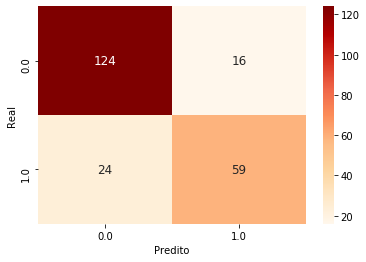

In [98]:
df_cm = pd.DataFrame({'y_real': y_real, 'y_pred': y_pred})
cm = pd.crosstab(df_cm['y_real'], df_cm['y_pred'], rownames=['Real'], colnames=['Predito'])
sns.heatmap(cm, annot=True, annot_kws={'size': 12}, fmt='d', cmap='OrRd')
plt.show()

__Tunando os hiperparâmentros (Grid Search)__

In [99]:
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV

__Definindo o grid de hiperparâmentros__

In [100]:
gridsearch_lr = dict()
gridsearch_lr['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
gridsearch_lr['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
gridsearch_lr['C'] = loguniform(1e-5, 100)

gridsearch_lr

{'solver': ['newton-cg', 'lbfgs', 'liblinear'],
 'penalty': ['none', 'l1', 'l2', 'elasticnet'],
 'C': <scipy.stats._distn_infrastructure.rv_frozen at 0x29bdbe010c8>}

In [101]:
search = RandomizedSearchCV(lr_model, gridsearch_lr, n_iter=500, scoring='accuracy', n_jobs=-1, cv=5, random_state=147, verbose=1)

In [102]:
result = search.fit(X_train_std, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:    7.2s


Best Score: 0.8293233082706767
Best Hyperparameters: {'C': 0.11175053023965054, 'penalty': 'l2', 'solver': 'lbfgs'}


[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    9.3s finished


In [103]:
accuracy_score(y_real, y_pred)

0.820627802690583

In [104]:
lr_model_pos = LogisticRegression(C= 0.021720591320214755, penalty= 'l2', solver= 'newton-cg', max_iter = 500000)
lr_model_pos.fit(X_train_std, y_train)

scores = cross_val_score(lr_model, X_train_std, y_train, cv=10)
print(scores)

y_pred = lr_model_pos.predict(X_val_std)
y_real = y_val.values

results['LR_GS'] = accuracy_score(y_real, y_pred)
accuracy_score(y_real, y_pred)

[0.88059701 0.82089552 0.80597015 0.86567164 0.80597015 0.82089552
 0.7761194  0.85074627 0.84848485 0.8030303 ]


0.8340807174887892

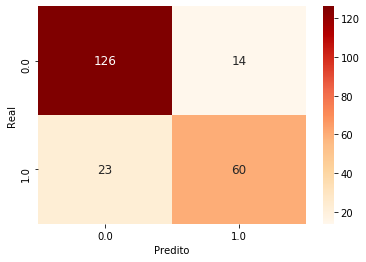

In [105]:
df_cm = pd.DataFrame({'y_real': y_real, 'y_pred': y_pred})
cm = pd.crosstab(df_cm['y_real'], df_cm['y_pred'], rownames=['Real'], colnames=['Predito'])
sns.heatmap(cm, annot=True, annot_kws={'size': 12}, fmt='d', cmap='OrRd')
plt.show()

In [106]:
tn, fp, fn, tp = confusion_matrix(y_real, y_pred).ravel()
(tn, fp, fn, tp)

(126, 14, 23, 60)

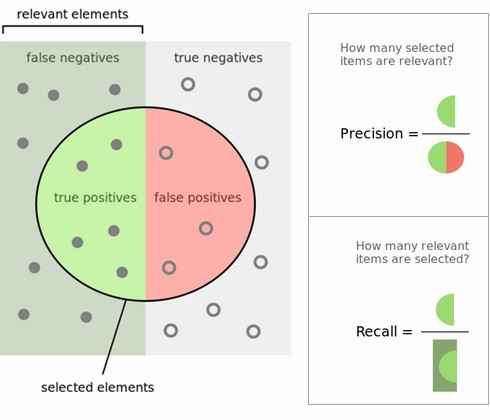

In [107]:
def metrics(tn, fp, fn, tp):
    acuracia = (tp + tn) / (tp + tn + fp + fn)
    precisao = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precisao * recall) / (precisao + recall)
    return acuracia, precisao, recall, f1 

metrics(tn, fp, fn, tp)

(0.8340807174887892,
 0.8108108108108109,
 0.7228915662650602,
 0.7643312101910827)

In [108]:
probs = lr_model.predict_proba(X_val_std)
probs[:5]

array([[0.07043253, 0.92956747],
       [0.08411962, 0.91588038],
       [0.2005551 , 0.7994449 ],
       [0.77110149, 0.22889851],
       [0.14987036, 0.85012964]])

In [109]:
probs = probs[:, 1]
probs[:5]

array([0.92956747, 0.91588038, 0.7994449 , 0.22889851, 0.85012964])

In [110]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, probs)

In [111]:
def plot_roc_curve(fpr, tpr):
    auc = roc_auc_score(y_val, probs)
    plt.figure(figsize=(12,6))
    plt.plot(fpr, tpr, color='orange', linewidth=2, label='AUROC: '+str('{:.3f}'.format(auc)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', linewidth=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('real Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

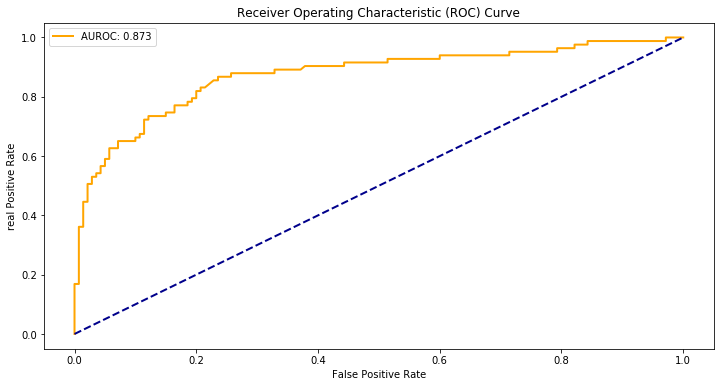

In [112]:
from sklearn.metrics import roc_auc_score
plot_roc_curve(fpr, tpr)

In [113]:
importance = pd.DataFrame(list(X))
importance.columns = ['Feature']
importance["Correlation"] = pd.Series(lr_model_pos.coef_[0])

importance.sort_values(by='Correlation', ascending=False).style.background_gradient(cmap='Blues')

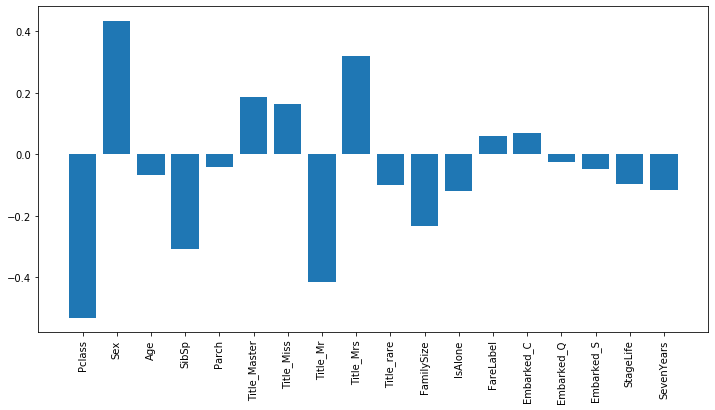

In [114]:
plt.figure(figsize=(12,6))
plt.bar([x for x in range(len(importance))], importance.Correlation.values)
plt.xticks([x for x in range(len(importance))], importance.Feature.unique(), rotation=90)
plt.show()

In [115]:
lr_model_pos.intercept_[0]

-0.5827274441097094

__Escrevendo a equação...__

Regressão linear:
$$y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... +\beta_{n}X_{n}$$

Regressão logistica:
$$p = 1 / (1 + e^{-y})$$
$$p = 1 / (1 + e^{-(\beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... +\beta_{n}X_{n})})$$

In [116]:
print('1 / (1 + e^-('+\
      str('{:.3f}'.format(lr_model_pos.intercept_[0]))+' + '+\
      str('{:.3f}'.format(lr_model_pos.coef_[0][0]))+'.'+X.columns[0]+' + '+\
      str('{:.3f}'.format(lr_model_pos.coef_[0][1]))+'.'+X.columns[1]+' + '+\
      str('{:.3f}'.format(lr_model_pos.coef_[0][2]))+'.'+X.columns[2]+' + '+\
      str('{:.3f}'.format(lr_model_pos.coef_[0][3]))+'.'+X.columns[3]+' + '+\
      str('{:.3f}'.format(lr_model_pos.coef_[0][4]))+'.'+X.columns[4]+' + '+\
      str('{:.3f}'.format(lr_model_pos.coef_[0][5]))+'.'+X.columns[5]+' + '+\
      str('{:.3f}'.format(lr_model_pos.coef_[0][6]))+'.'+X.columns[6]+' + '+\
      str('{:.3f}'.format(lr_model_pos.coef_[0][7]))+'.'+X.columns[7]+' + '+\
      str('{:.3f}'.format(lr_model_pos.coef_[0][8]))+'.'+X.columns[8]+' + '+\
      str('{:.3f}'.format(lr_model_pos.coef_[0][9]))+'.'+X.columns[9]+' + '+\
      str('{:.3f}'.format(lr_model_pos.coef_[0][10]))+'.'+X.columns[10] +'))')

1 / (1 + e^-(-0.583 + -0.531.Pclass + 0.434.Sex + -0.066.Age + -0.308.SibSp + -0.042.Parch + 0.186.Title_Master + 0.166.Title_Miss + -0.416.Title_Mr + 0.321.Title_Mrs + -0.099.Title_rare + -0.233.FamilySize))


__Decision Tree__

O algoritmo de árvore de decisão é um algoritmo de classificação eficaz e simples de interpretar e usar em dados. A ideia da árvore de decisão é dividir o conjunto de dados inicial (raiz) em menores conjuntos (folhas) através de regras como respostas VERDADEIRO ou FALSO.

In [117]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=7, random_state=147)
dt_model.fit(X_train_std, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=147, splitter='best')

In [118]:
scores = cross_val_score(dt_model, X_train_std, y_train, cv=10)
scores

array([0.8358209 , 0.80597015, 0.79104478, 0.82089552, 0.79104478,
       0.82089552, 0.74626866, 0.89552239, 0.83333333, 0.75757576])

In [119]:
y_pred = dt_model.predict(X_val_std)
y_real = y_val.values

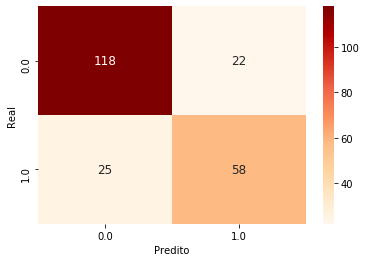

In [120]:
df_cm = pd.DataFrame({'y_real': y_real, 'y_pred': y_pred})
cm = pd.crosstab(df_cm['y_real'], df_cm['y_pred'], rownames=['Real'], colnames=['Predito'])
sns.heatmap(cm, annot=True, annot_kws={'size': 12}, fmt='d', cmap='OrRd')
plt.show()

In [121]:
results['DT'] = accuracy_score(y_real, y_pred)
print(classification_report(y_real, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.84      0.83       140
         1.0       0.72      0.70      0.71        83

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.79      0.79      0.79       223



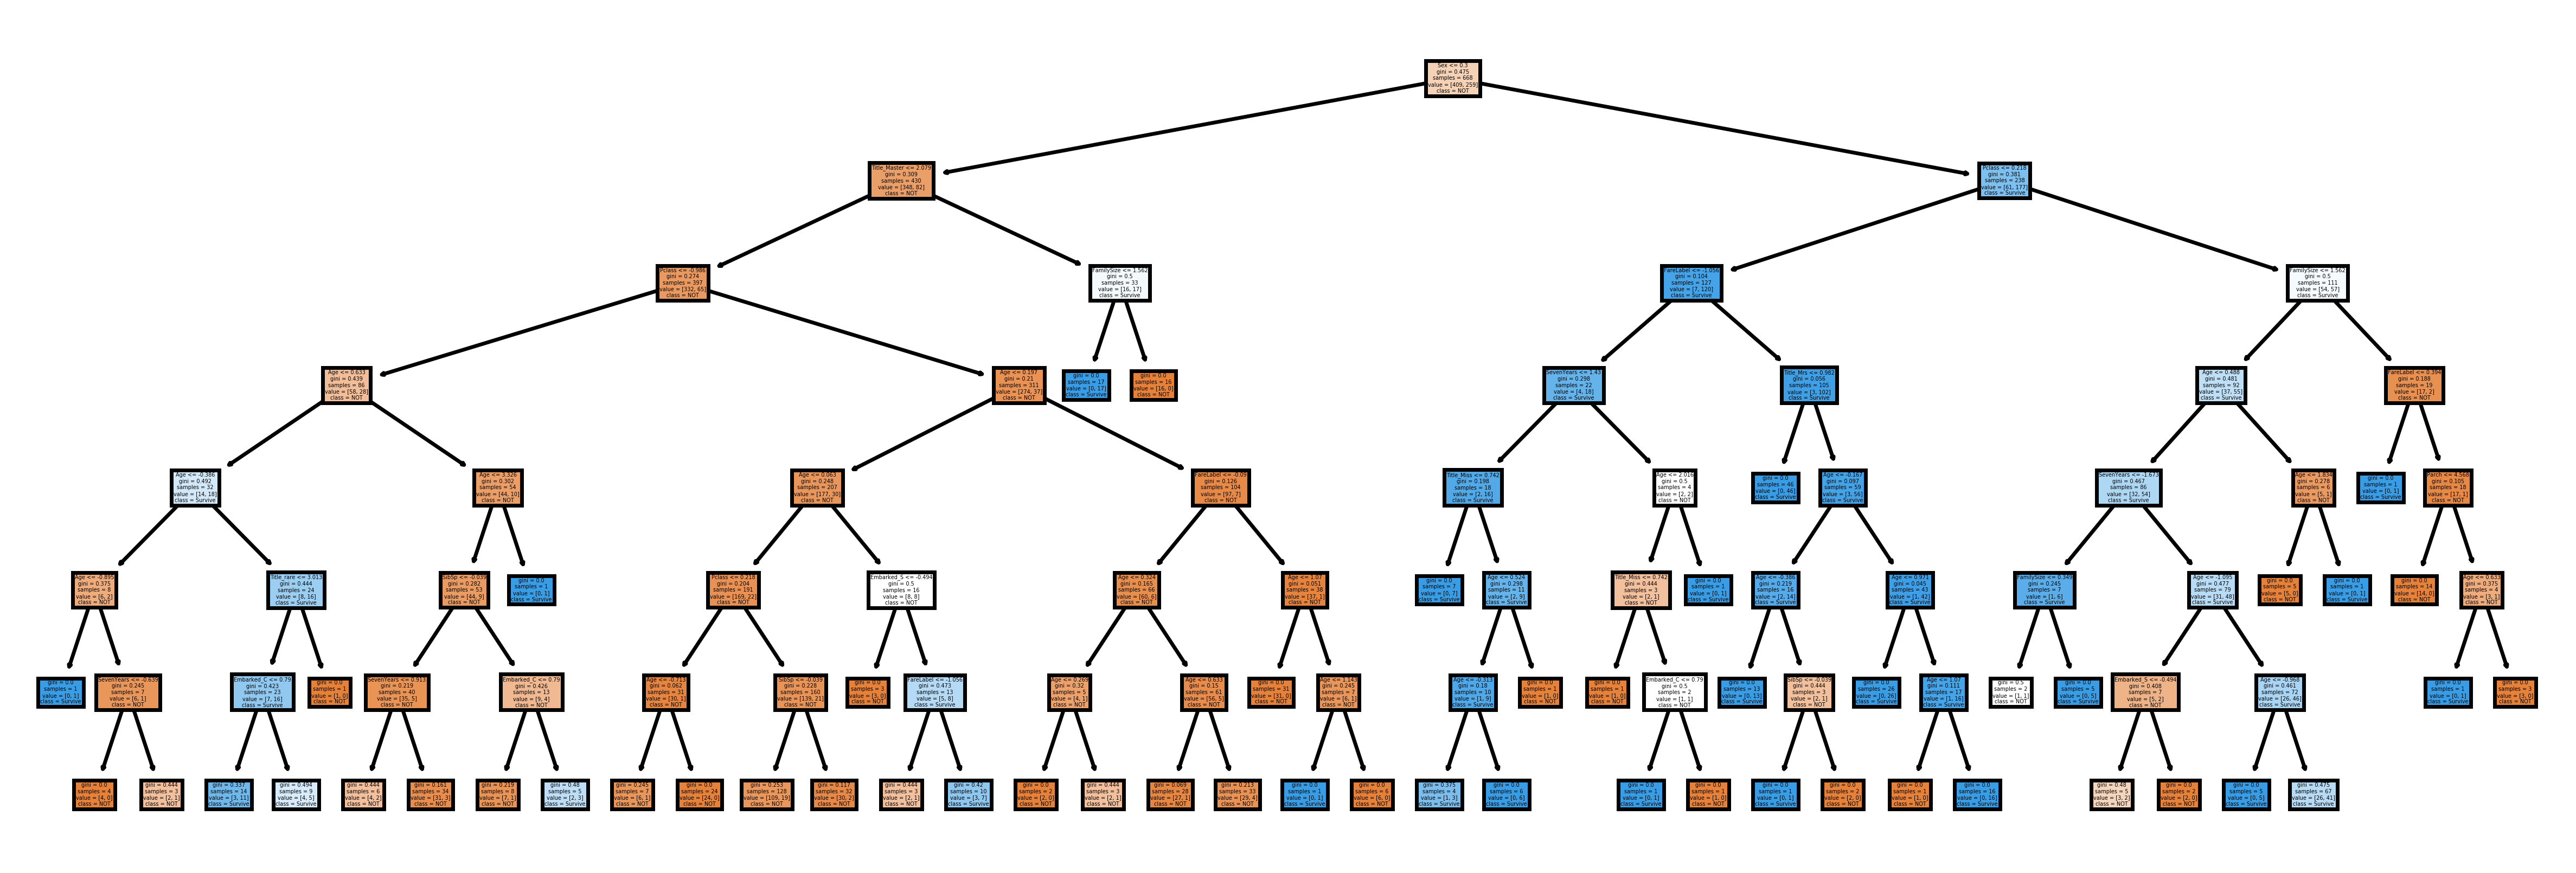

In [122]:
from sklearn import tree

fn = list(X.columns)
cn = ['NOT','Survive']

plt.figure(figsize=(12,4), dpi=500)
tree.plot_tree(dt_model,
               filled=True,
               feature_names=fn,
               class_names=cn);

In [123]:
dt_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=147, splitter='best')

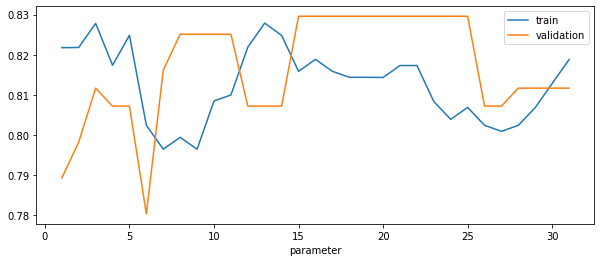

In [124]:
gs_parameter = []
gs_train = []
gs_val = []
for x in list(range(1, 32)):
    gs_parameter.append(x)
    dt_model_pos = DecisionTreeClassifier(max_depth=5, max_features=6, min_samples_leaf=x, criterion= 'entropy', random_state=147)
    dt_model_pos.fit(X_train_std, y_train)

    scores = cross_val_score(dt_model_pos, X_train_std, y_train, cv=10)
    gs_train.append(np.mean(scores))
    
    y_val_pred = dt_model_pos.predict(X_val_std)
    y_val_real = y_val.values
    gs_val.append(accuracy_score(y_val_real, y_val_pred))
    
pd.DataFrame({'parameter':gs_parameter, 'train': gs_train, 'validation': gs_val}).set_index('parameter').plot(kind = 'line', figsize=(10,4));

In [125]:
dt_model_pos = DecisionTreeClassifier(max_depth=5, max_features=6, min_samples_leaf=20, criterion= 'entropy', random_state=147)
dt_model_pos.fit(X_train_std, y_train)

scores = cross_val_score(dt_model_pos, X_train_std, y_train, cv=10)
print(np.mean(scores))

y_val_pred = dt_model_pos.predict(X_val_std)
y_val_real = y_val.values
print(accuracy_score(y_val_real, y_val_pred))

0.814314789687924
0.8295964125560538


[0.89552239 0.74626866 0.8358209  0.82089552 0.79104478 0.8358209
 0.80597015 0.82089552 0.86363636 0.72727273]


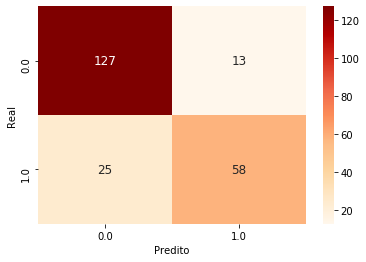

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       140
         1.0       0.82      0.70      0.75        83

    accuracy                           0.83       223
   macro avg       0.83      0.80      0.81       223
weighted avg       0.83      0.83      0.83       223



In [126]:
scores = cross_val_score(dt_model_pos, X_train_std, y_train, cv=10)
print(scores)

y_pred = dt_model_pos.predict(X_val_std)

df_cm = pd.DataFrame({'y_real': y_real, 'y_pred': y_pred})
cm = pd.crosstab(df_cm['y_real'], df_cm['y_pred'], rownames=['Real'], colnames=['Predito'])
sns.heatmap(cm, annot=True, annot_kws={'size': 12}, fmt='d', cmap='OrRd')
plt.show()

print(classification_report(y_real, y_pred))

In [127]:
results['DT_GS'] = accuracy_score(y_real, y_pred)
accuracy_score(y_real, y_pred)

0.8295964125560538

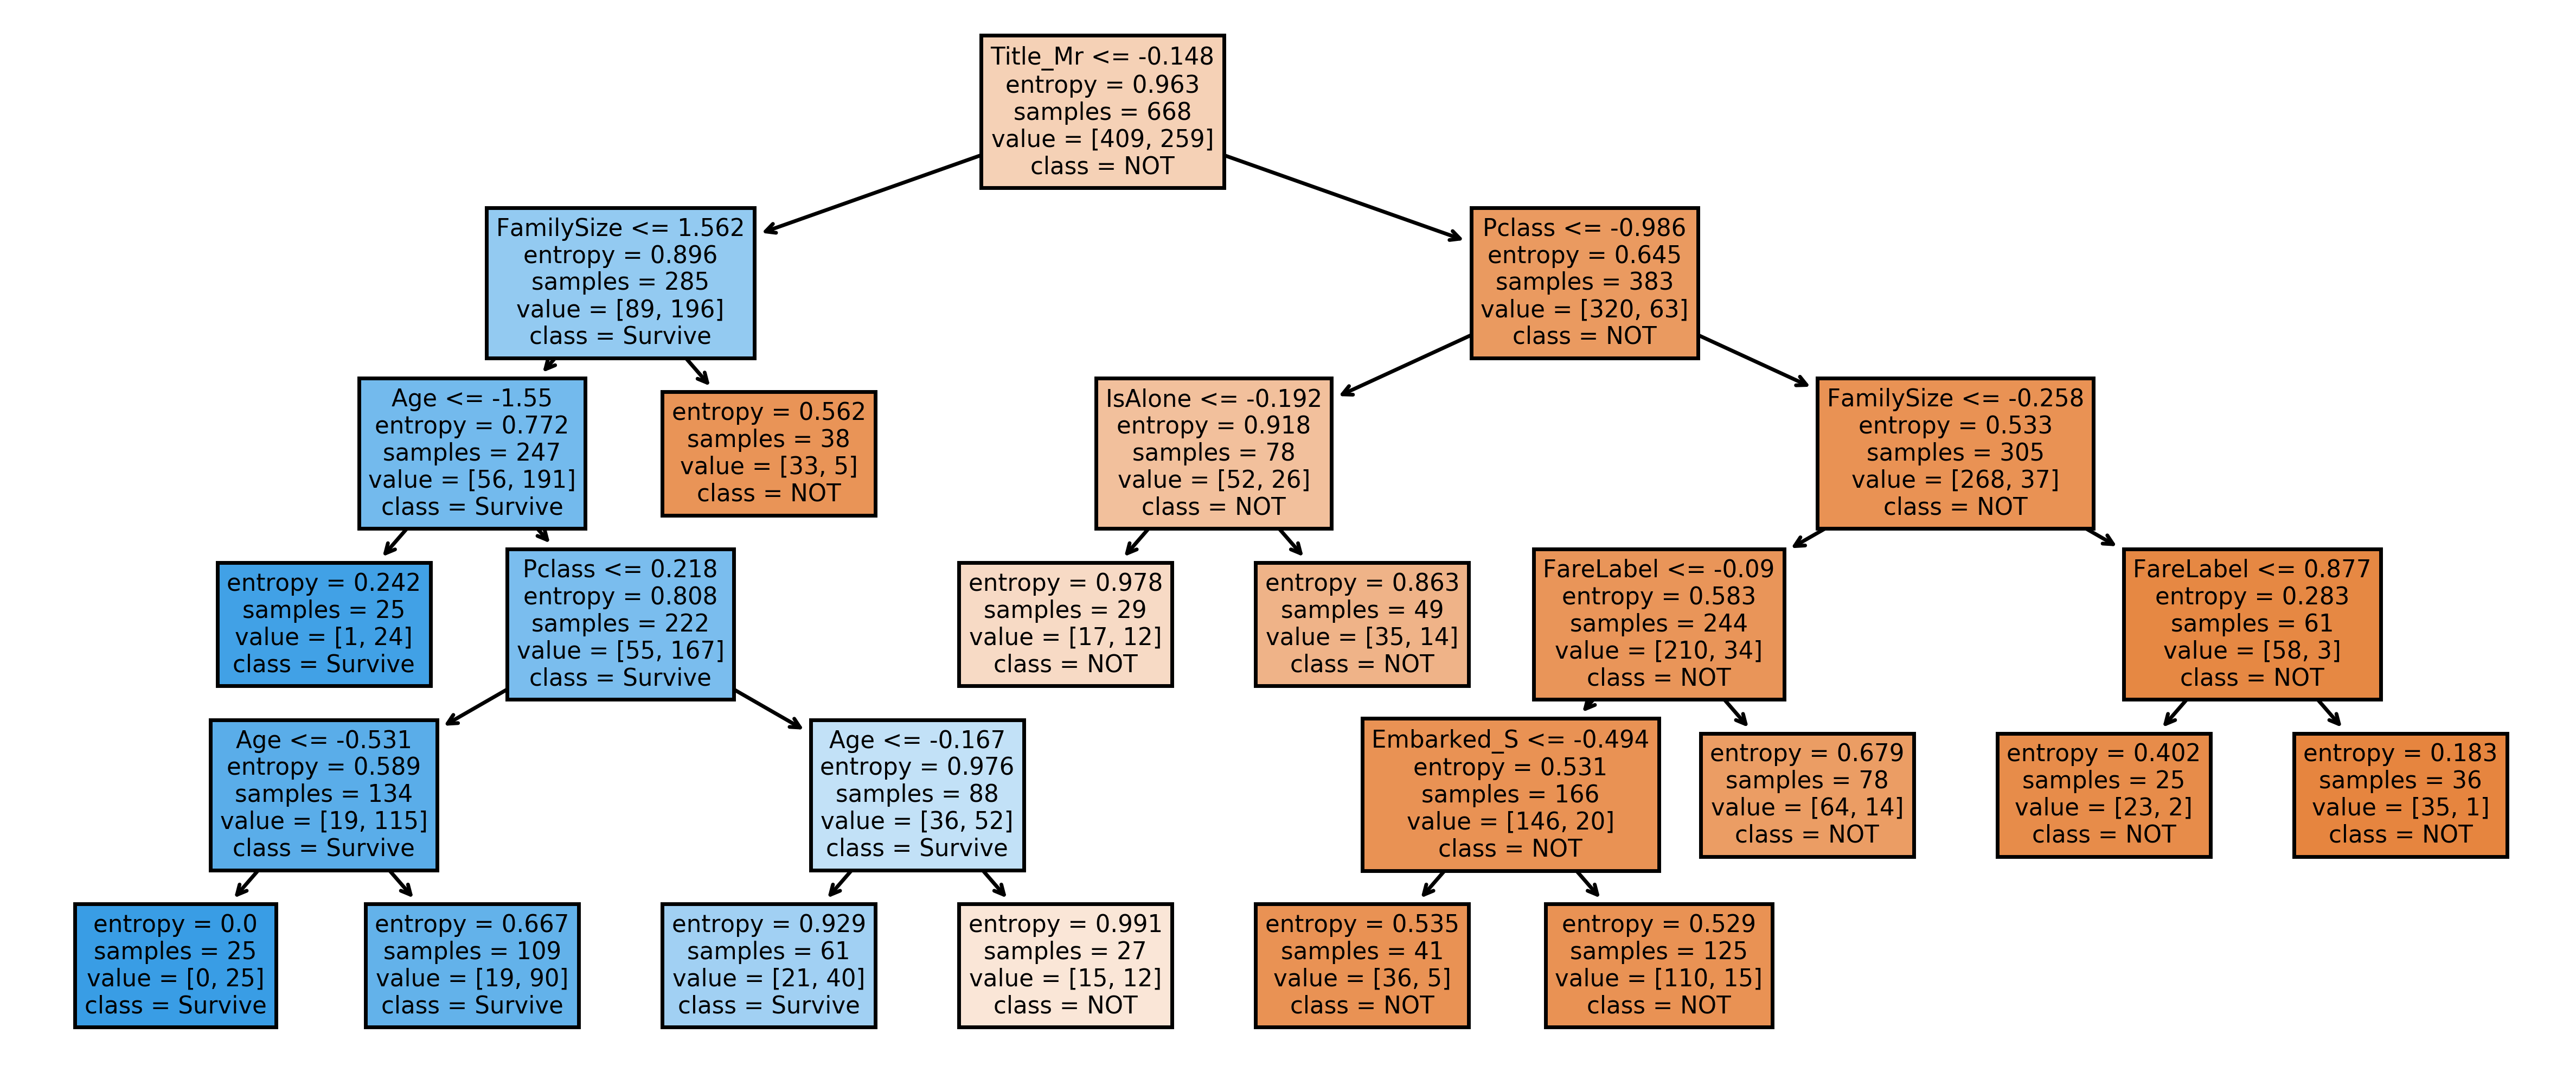

In [128]:
from sklearn import tree

fn = list(X.columns)
cn = ['NOT','Survive']

plt.figure(figsize=(12,5), dpi=500)
tree.plot_tree(dt_model_pos,
               filled=True,
               feature_names=fn,
               class_names=cn);

In [129]:
importance = pd.DataFrame(list(X))
importance.columns = ['Feature']
importance["Correlation"] = pd.Series(dt_model_pos.feature_importances_)
importance = importance.sort_values(by='Correlation', ascending=False)
importance.style.background_gradient(cmap='Blues')

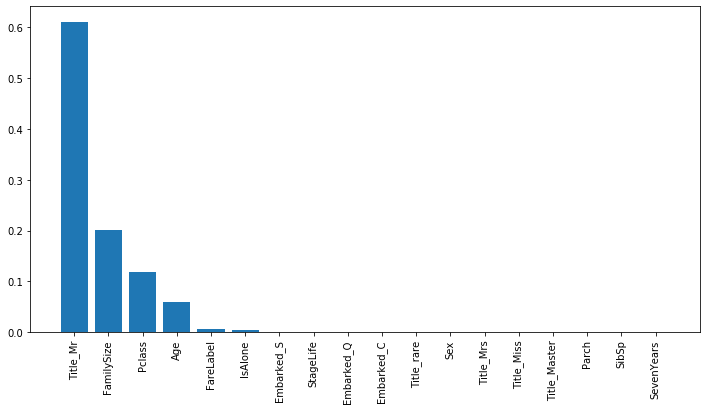

In [130]:
plt.figure(figsize=(12,6))
plt.bar([x for x in range(len(importance))], importance.Correlation.values)
plt.xticks([x for x in range(len(importance))], importance.Feature.unique(), rotation=90)
plt.show()

__Support Vector Machine__

Support Vector Machines é talvez um dos mais populares e falados algoritmos de aprendizado de máquina. É principalmente um método que executa tarefas de classificação construindo hiperplanos em um espaço multidimensional que separa casos de rótulos de classes diferentes. SVM suporta tarefas de regressão e classificação e pode lidar com múltiplas variáveis contínuas e categóricas

__SVM - linear__

In [131]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear')
svm_model_linear.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [132]:
scores = cross_val_score(svm_model_linear, X_train_std, y_train, cv=10)
scores

array([0.86567164, 0.82089552, 0.80597015, 0.88059701, 0.79104478,
       0.8358209 , 0.76119403, 0.82089552, 0.86363636, 0.78787879])

In [133]:
y_pred = svm_model_linear.predict(X_val)
accuracy = svm_model_linear.score(X_val, y_val)
print(accuracy)

0.8161434977578476


In [134]:
results['SVM_L'] = accuracy_score(y_real, y_pred)

__SVM - polinomial__

In [135]:
svm_model_poly = SVC(kernel = 'poly')
svm_model_poly.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [136]:
scores = cross_val_score(svm_model_poly, X_train_std, y_train, cv=10)
scores

array([0.82089552, 0.8358209 , 0.80597015, 0.86567164, 0.79104478,
       0.82089552, 0.7761194 , 0.8358209 , 0.87878788, 0.78787879])

In [137]:
y_pred = svm_model_poly.predict(X_val)
accuracy = svm_model_poly.score(X_val, y_val)
print(accuracy)

0.6905829596412556


In [138]:
results['SVM_P'] = accuracy_score(y_real, y_pred)

__SVM - função de base radial (RBF)__

In [139]:
svm_model_rbf = SVC(kernel = 'rbf')
svm_model_rbf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [140]:
scores = cross_val_score(svm_model_rbf, X_train_std, y_train, cv=10)
scores

array([0.8358209 , 0.82089552, 0.82089552, 0.89552239, 0.79104478,
       0.80597015, 0.76119403, 0.8358209 , 0.87878788, 0.78787879])

In [141]:
y_pred = svm_model_rbf.predict(X_val)
accuracy = svm_model_rbf.score(X_val, y_val)
print(accuracy)

0.6681614349775785


In [142]:
results['SVM_R'] = accuracy_score(y_real, y_pred)

__SVM - sigmoidal__

In [143]:
svm_model_sigmoid = SVC(kernel = 'sigmoid')
svm_model_sigmoid.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [144]:
scores = cross_val_score(svm_model_sigmoid, X_train_std, y_train, cv=10)
scores

array([0.80597015, 0.74626866, 0.79104478, 0.76119403, 0.73134328,
       0.68656716, 0.71641791, 0.8358209 , 0.68181818, 0.78787879])

In [145]:
y_pred = svm_model_sigmoid.predict(X_val)
accuracy = svm_model_sigmoid.score(X_val, y_val)
print(accuracy)

0.6816143497757847


In [146]:
results['SVM_S'] = accuracy_score(y_real, y_pred)

__Naive Bayes Algorithm__

Um classificador naive bayes não é um algoritmo único, mas uma família de algoritmos de aprendizado de máquina que usam a teoria da probabilidade para classificar dados com uma suposição de independência entre preditores.

In [147]:
from sklearn.naive_bayes import GaussianNB
nb_model_gaussian = GaussianNB()
nb_model_gaussian.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [148]:
scores = cross_val_score(nb_model_gaussian, X_train_std, y_train, cv=10)
scores

array([0.85074627, 0.8358209 , 0.79104478, 0.86567164, 0.7761194 ,
       0.82089552, 0.7761194 , 0.82089552, 0.84848485, 0.78787879])

In [149]:
y_pred = nb_model_gaussian.predict(X_val)
accuracy = nb_model_gaussian.score(X_val, y_val)
print(accuracy)

0.820627802690583


In [150]:
results['NB_G'] = accuracy_score(y_real, y_pred)

In [151]:
from sklearn.naive_bayes import BernoulliNB
nb_model_bernoulli = BernoulliNB()
nb_model_bernoulli.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [152]:
scores = cross_val_score(nb_model_bernoulli, X_train_std, y_train, cv=10)
scores

array([0.86567164, 0.7761194 , 0.79104478, 0.74626866, 0.76119403,
       0.73134328, 0.71641791, 0.82089552, 0.81818182, 0.77272727])

In [153]:
y_pred = nb_model_bernoulli.predict(X_val)
accuracy = nb_model_bernoulli.score(X_val, y_val)
print(accuracy)

0.8116591928251121


In [154]:
results['NB_B'] = accuracy_score(y_real, y_pred)

__KNN__

KNN não aprende nenhum modelo. ele armazena todo o conjunto de dados de treinamento que ele utiliza como sua representação. A saída pode ser calculada como a classe com a frequência mais alta das K-instâncias mais semelhantes (mais próximas).

In [155]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [156]:
scores = cross_val_score(knn_model, X_train_std, y_train, cv=10)
scores

array([0.8358209 , 0.82089552, 0.80597015, 0.88059701, 0.82089552,
       0.8358209 , 0.73134328, 0.89552239, 0.87878788, 0.78787879])

In [157]:
y_pred = knn_model.predict(X_val)
accuracy = knn_model.score(X_val, y_val)
print(accuracy)

0.757847533632287


In [158]:
results['KNN'] = accuracy_score(y_real, y_pred)

__Perceptron__

Rede neural de uma única camada oculta.

In [159]:
from sklearn.linear_model import Perceptron
nn_model = Perceptron(tol=1e-3)
nn_model.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [160]:
scores = cross_val_score(nn_model, X_train_std, y_train, cv=10)
scores

array([0.7761194 , 0.80597015, 0.76119403, 0.7761194 , 0.62686567,
       0.73134328, 0.6119403 , 0.73134328, 0.81818182, 0.62121212])

In [161]:
y_pred = nn_model.predict(X_val)
accuracy = nn_model.score(X_val, y_val)
print(accuracy)

0.7847533632286996


In [162]:
results['NN'] = accuracy_score(y_real, y_pred)

__Random Forest__

A floresta randômica é uma conjunto de árvores de decisão (floresta) obtendo uma previsão mais precisa e estável. Pode ser usado para problemas de classificação e regressão.

In [163]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=7)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [164]:
scores = cross_val_score(rf_model, X_train_std, y_train, cv=10)
scores

array([0.85074627, 0.80597015, 0.80597015, 0.8358209 , 0.82089552,
       0.80597015, 0.74626866, 0.80597015, 0.83333333, 0.77272727])

In [165]:
y_pred = rf_model.predict(X_val)
accuracy = rf_model.score(X_val, y_val)
print(accuracy)

0.8295964125560538


In [166]:
results['RF'] = accuracy_score(y_real, y_pred)

In [167]:
rf_model.estimators_[:5]

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=7, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=385009276, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=7, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1686353828, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=7, max_featur

In [168]:
print(len(rf_model.estimators_))

100


In [169]:
rf_model.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=385009276, splitter='best')

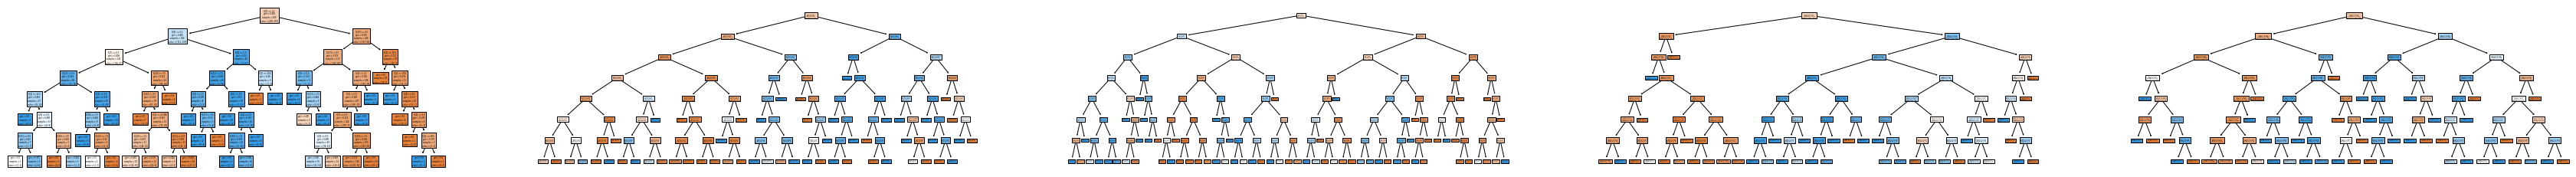

In [170]:
fig, axes = plt.subplots(1, 5, figsize=(60,4))
for index in range(5):
    tree.plot_tree(rf_model.estimators_[index], ax=axes[index], filled=True);

In [171]:
importance = pd.DataFrame(list(X))
importance.columns = ['Feature']
importance["Correlation"] = pd.Series(rf_model.feature_importances_)
importance = importance.sort_values(by='Correlation', ascending=False)
importance.style.background_gradient(cmap='Blues')

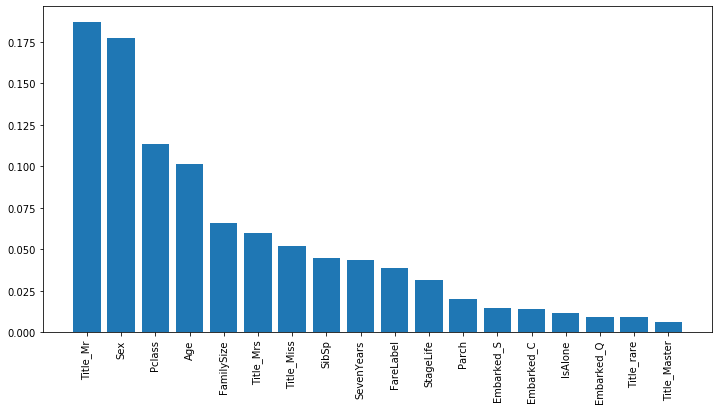

In [172]:
plt.figure(figsize=(12,6))
plt.bar([x for x in range(len(importance))], importance.Correlation.values)
plt.xticks([x for x in range(len(importance))], importance.Feature.unique(), rotation=90)
plt.show()

__Gradient Boosting__

O Gradient Boosting é um algoritmo onde converte o preditor fraco em forte. Nesta nova árvore é a metrica vai melhorando em relação a anterior.

In [173]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [174]:
scores = cross_val_score(gb_model, X_train_std, y_train, cv=10)
scores

array([0.88059701, 0.79104478, 0.79104478, 0.7761194 , 0.82089552,
       0.88059701, 0.7761194 , 0.85074627, 0.86363636, 0.75757576])

In [175]:
y_pred = gb_model.predict(X_val)
accuracy = gb_model.score(X_val, y_val)
print(accuracy)

0.852017937219731


In [176]:
results['GB'] = accuracy_score(y_real, y_pred)

In [177]:
gb_model.estimators_[:5]

array([[DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x29BD4203E18,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x29BD4203E18,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion='

In [178]:
print(len(gb_model.estimators_))

100


In [179]:
gb_model.estimators_[0][0]

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x29BD4203E18,
                      splitter='best')

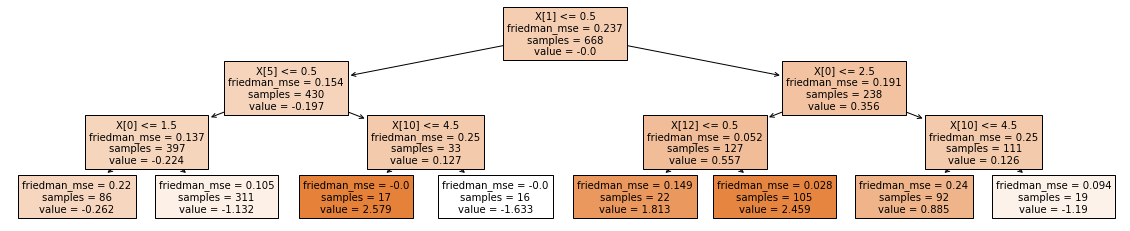

In [180]:
plt.figure(figsize=(20,4))
tree.plot_tree(gb_model.estimators_[0][0], filled=True)
plt.savefig('gb_tree.png')

In [181]:
importance = pd.DataFrame(list(X))
importance.columns = ['Feature']
importance["Correlation"] = pd.Series(gb_model.feature_importances_)
importance = importance.sort_values(by='Correlation', ascending=False)
importance.style.background_gradient(cmap='Blues')

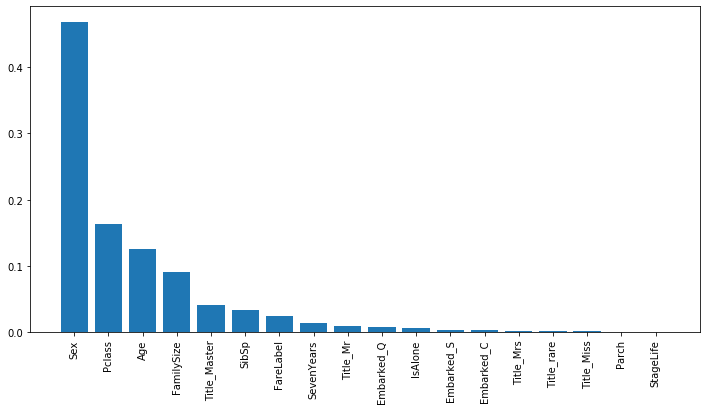

In [182]:
plt.figure(figsize=(12,6))
plt.bar([x for x in range(len(importance))], importance.Correlation.values)
plt.xticks([x for x in range(len(importance))], importance.Feature.unique(), rotation=90)
plt.show()

In [183]:
gb_model.estimators_[-1][0]

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x29BD4203E18,
                      splitter='best')

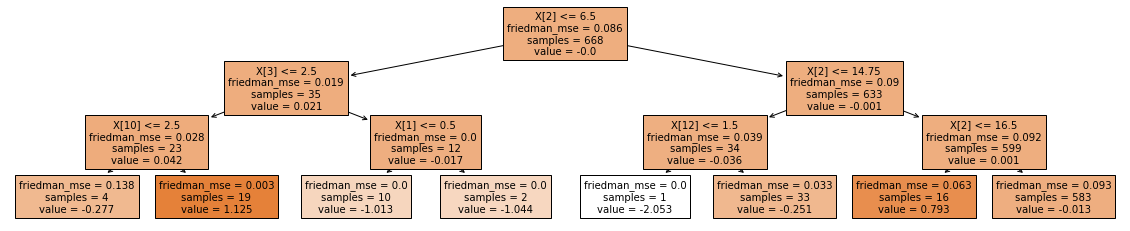

In [184]:
plt.figure(figsize=(20,4))
tree.plot_tree(gb_model.estimators_[-1][0], filled=True)
plt.savefig('gb_tree.png')

__Concluindo__

In [185]:
pd.DataFrame(results, index=['resultados']).T.sort_values('resultados', ascending=False).style.background_gradient(cmap='Blues')

__Salvando o modelo__

In [186]:
import pickle
model_name = "model.pkl"  

MODEL = gb_model

with open(model_name, 'wb') as file:  
    pickle.dump(MODEL, file)

__Carregando modelo__

In [187]:
with open(model_name, 'rb') as file:  
    model_ressureto = pickle.load(file)

model_ressureto

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [188]:
model_ressureto.score(X_val, y_val)

0.852017937219731

In [189]:
X_test = test.drop('Survived', axis=1)
ss = StandardScaler()
ss.fit(X_test)

predicted = model_ressureto.predict(X_test)
test['Survived'] = predicted

C:\Users\Felipe Gollino\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [190]:
db_final = pd.concat([train, test])
db_final = db_final.reset_index()
db_final.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  Title_Master  \
0            1       0.0       3    0  22.0      1      0             0   
1            2       1.0       1    1  38.0      1      0             0   
2            3       1.0       3    1  26.0      0      0             0   
3            4       1.0       1    1  35.0      1      0             0   
4            5       0.0       3    0  35.0      0      0             0   

   Title_Miss  Title_Mr  Title_Mrs  Title_rare  FamilySize  IsAlone  \
0           0         1          0           0           2        0   
1           0         0          1           0           2        0   
2           1         0          0           0           1        1   
3           0         0          1           0           2        0   
4           0         1          0           0           1        1   

   FareLabel  Embarked_C  Embarked_Q  Embarked_S  StageLife  SevenYears  
0        1.0           0           0           1        4.0         3.0  
1        2.0           1           0           0        4.0         5.0  
2        1.0           0           0           1        4.0         3.0  
3        1.0           0           0           1        4.0         4.0  
4        2.0           0           0           1        4.0         4.0

In [191]:
db_orig.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [192]:
cols_to_use = list(db_orig.columns.difference(db_final.columns))
cols_to_use.append('PassengerId')
cols_to_use

['Cabin', 'Embarked', 'Fare', 'Name', 'Ticket', 'PassengerId']

In [193]:
complete = pd.merge(db_final, db_orig[cols_to_use], on='PassengerId', how='left')

In [194]:
complete.loc[complete.Age < 15, 'Sex'] = 'Children'
complete.loc[complete.Sex == 0, 'Sex'] = 'Men'
complete.loc[complete.Sex == 1, 'Sex'] = 'Women'
complete.loc[complete.Pclass == 1, 'Pclass'] = 'First Class'
complete.loc[complete.Pclass == 2, 'Pclass'] = 'Second Class'
complete.loc[complete.Pclass == 3, 'Pclass'] = 'Third Class'

In [195]:
table_count = complete.groupby(['Sex','Pclass'])['Survived'].count().to_frame().rename(columns={'Survived':'Number aboard'}).astype(int)
table_sum = complete.groupby(['Sex','Pclass'])['Survived'].sum().to_frame().rename(columns={'Survived':'Number saved'}).astype(int)
table = table_count.join(table_sum)
table['Number lost'] = (table['Number aboard'] - table['Number saved'])
table['Percentage saved'] =  ((table['Number saved'] / table['Number aboard']) * 100).astype(int)
table['Percentage lost'] = (100 - table['Percentage saved']).astype(int)
table.style.background_gradient(cmap='Blues')

|Age/sex|Class/crew|Number aboard|Number saved|Number lost|Percentage saved|Percentage lost|
|-|-|-|-|-|-|-|
|Children|First Class|6|5|1|83%|17%|
||Second Class|24|24|0|100%|0%|
||Third Class|79|27|52|34%|66%|
|Men|First Class|175|57|118|33%|67%|
||Second Class|168|14|154|8%|92%|
||Third Class|462|75|387|16%|84%|
||Crew|885|192|693|22%|78%|
|Women|First Class|144|140|4|97%|3%|
||Second Class|93|80|13|86%|14%|
||Third Class|165|76|89|46%|54%|
||Crew|23|20|3|87%|13%|
|Total||2224|710|1514|32%|68|

__Classificação Multiclasse__

In [196]:
from sklearn import datasets

iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names_iris = iris.feature_names
class_names_iris = iris.target_names

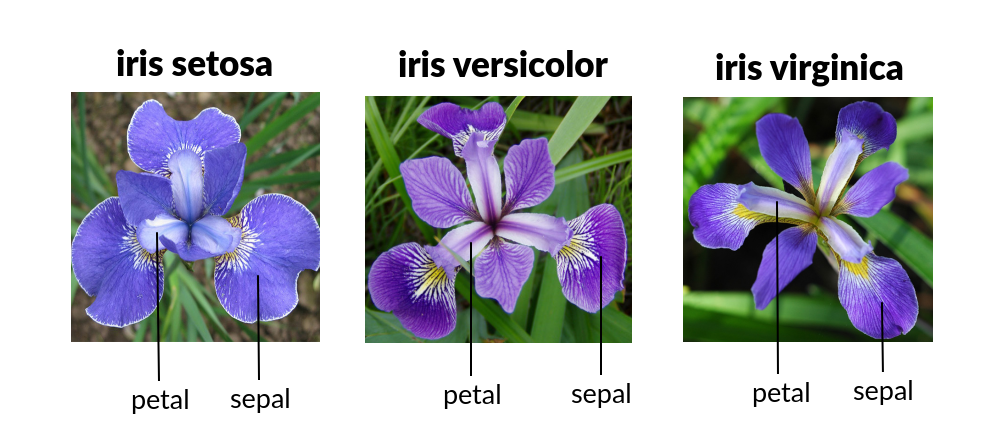

In [197]:
df_iris = pd.DataFrame(X_iris, columns=feature_names_iris)
df_iris['target'] = y_iris
df_iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [198]:
df_iris.target.value_counts().sort_index()

0    50
1    50
2    50
Name: target, dtype: int64

In [199]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.25, random_state=147)

In [200]:
dt_iris_model = DecisionTreeClassifier(max_depth=2)
dt_iris_model.fit(X_train_iris, y_train_iris)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [201]:
scores = cross_val_score(dt_iris_model, X_train_std, y_train, cv=10)
scores

array([0.7761194 , 0.7761194 , 0.7761194 , 0.73134328, 0.7761194 ,
       0.70149254, 0.70149254, 0.80597015, 0.77272727, 0.77272727])

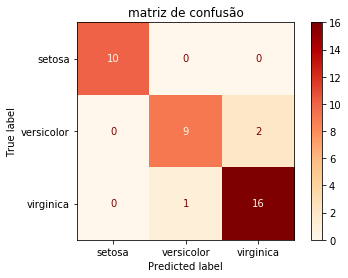

In [202]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(dt_iris_model,
                             X_test_iris,
                             y_test_iris,
                             display_labels=class_names_iris,
                             cmap='OrRd',
                             normalize=None)
disp.ax_.set_title('matriz de confusão');

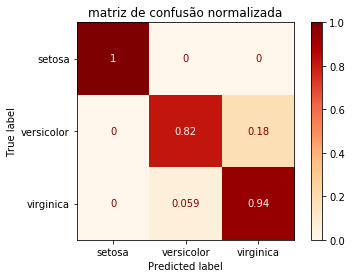

In [203]:
disp = plot_confusion_matrix(dt_iris_model,
                             X_test_iris,
                             y_test_iris,
                             display_labels=class_names_iris,
                             cmap='OrRd',
                             normalize='true')
disp.ax_.set_title('matriz de confusão normalizada');

In [204]:
y_pred_iris = dt_iris_model.predict(X_test_iris)
accuracy = dt_iris_model.score(X_test_iris, y_test_iris)
print(accuracy)

0.9210526315789473


In [205]:
y_real_iris = y_test_iris
print(classification_report(y_real_iris, y_pred_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.82      0.86        11
           2       0.89      0.94      0.91        17

    accuracy                           0.92        38
   macro avg       0.93      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



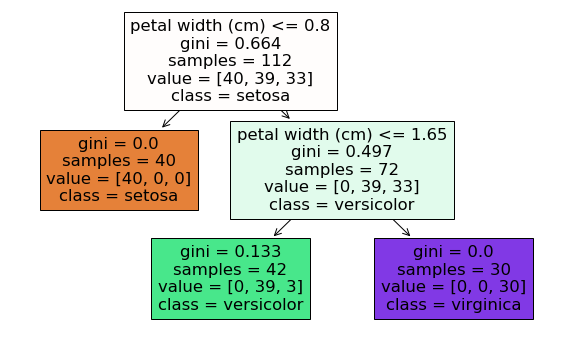

In [206]:
plt.figure(figsize=(10,6))
tree.plot_tree(dt_iris_model, feature_names=feature_names_iris, class_names=class_names_iris, filled=True)
plt.show();

___

__Alguns fatos interessantes:__
* https://social.shorthand.com/TitanicMystery/ugYLJfuYydf/top-10-most-notable-people-on-titanic
* https://www.cosmopolitan.com/entertainment/movies/g14435920/titanic-real-characters-photos/

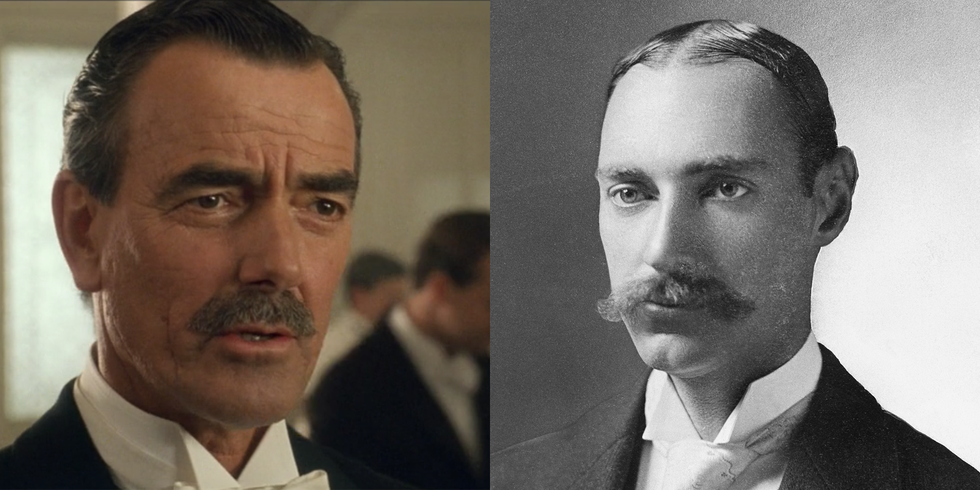
* __John Jacob Astor IV__

John Jacob Astor IV, interpretado por Eric Braeden, era o passageiro mais rico do Titanic e um dos homens mais ricos do mundo na época do naufrágio. Seu corpo foi posteriormente recuperado e identificado por iniciais costuradas em sua roupa além de $ 2.440 com ele.. Famosa por casar-se com sua esposa Madeleine em 11 de setembro de 1911, que na época ela tinha apenas 18 anos, o que a tornava 29 anos mais jovem.

In [207]:
complete.loc[complete.Name.str.contains('Astor, Col. John Jacob')]

PassengerId  Survived       Pclass  Sex   Age  SibSp  Parch  \
1093         1094       0.0  First Class  Men  47.0      1      0   

      Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_rare  FamilySize  \
1093             0           0         0          0           1           2   

      IsAlone  FareLabel  Embarked_C  Embarked_Q  Embarked_S  StageLife  \
1093        0        3.0           1           0           0        5.0   

      SevenYears    Cabin Embarked     Fare                    Name    Ticket  
1093         6.0  C62 C64        C  227.525  Astor, Col. John Jacob  PC 17757

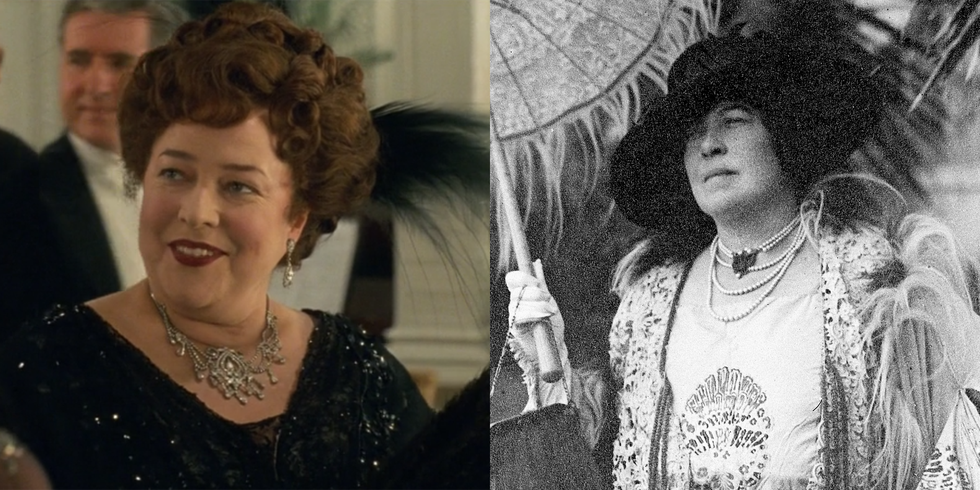
* __Margaret Brown__

Kathy Bates interpretou Margaret Brown, comumente conhecida como Molly Brown Inafundável. Ela ganhou o apelido porque pediu ao tripulante encarregado de seu bote salva-vidas que voltasse e resgatasse mais passageiros, a história ganhou foi representada - um musical chamado "The Unsinkable Molly Brown" que estreou em 1960.

In [208]:
complete.loc[complete.Name.str.contains('Brown, Mrs. James Joseph \(Margaret Tobin\)')]

PassengerId  Survived       Pclass    Sex   Age  SibSp  Parch  \
194          195       1.0  First Class  Women  44.0      0      0   

     Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_rare  FamilySize  \
194             0           0         0          1           0           1   

     IsAlone  FareLabel  Embarked_C  Embarked_Q  Embarked_S  StageLife  \
194        1        0.0           1           0           0        5.0   

     SevenYears Cabin Embarked     Fare  \
194         6.0    B4        C  27.7208   

                                          Name    Ticket  
194  Brown, Mrs. James Joseph (Margaret Tobin)  PC 17610

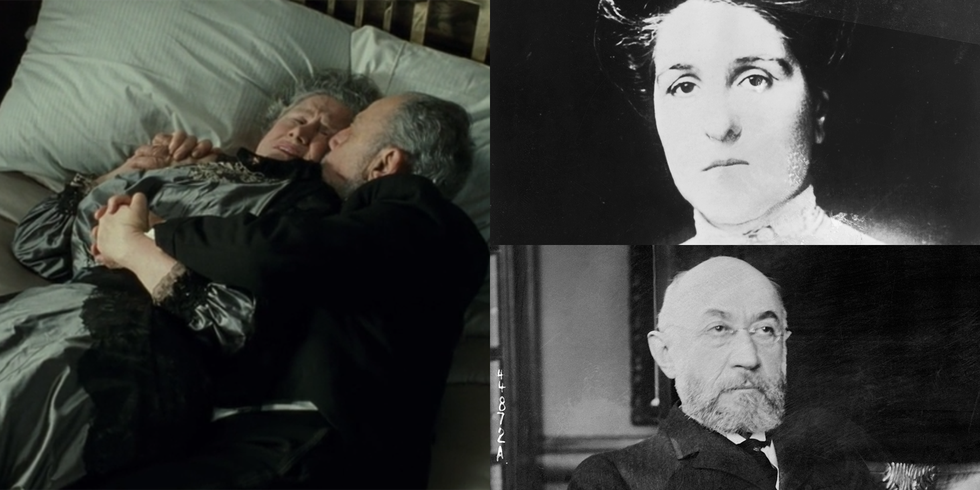
* __Ida e Isidor Straus__

Isidor Straus, interpretado por Lew Palter, era o coproprietário da loja de departamentos Macy's. Sua  Ida, interpretada por Elsa Raven, se recusou a embarcar em um barco salva-vidas ao descobrir que seu marido não poderia embarcar, os dois morreram no naufrágio.

In [209]:
complete.loc[complete.Name.str.contains('Straus, Mr. Isidor')]
# complete.loc[complete.Name.str.contains('Straus, Mrs. Isidor \(Rosalie Ida Blun\)')]

PassengerId  Survived       Pclass  Sex   Age  SibSp  Parch  \
972          973       0.0  First Class  Men  67.0      1      0   

     Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_rare  FamilySize  \
972             0           0         1          0           0           2   

     IsAlone  FareLabel  Embarked_C  Embarked_Q  Embarked_S  StageLife  \
972        0        3.0           0           0           1        6.0   

     SevenYears    Cabin Embarked      Fare                Name    Ticket  
972         9.0  C55 C57        S  221.7792  Straus, Mr. Isidor  PC 17483

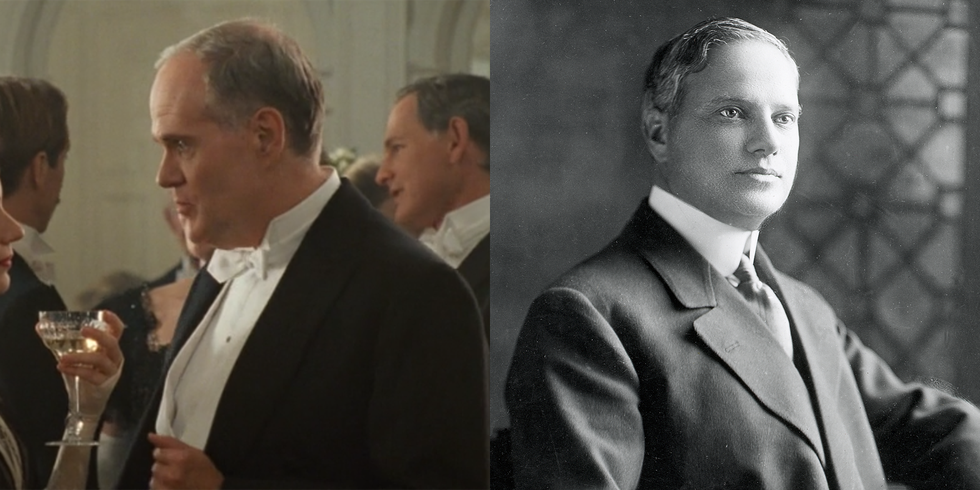
* __Benjamin Guggenheim__

Benjamin Guggenheim, interpretado Michael Ensign em Titanic, famoso não só por ter sua amante, Léontine Aubart (cantora francesa) com ele no navio, mas também por ir para a sala de fumo da primeira classe com seu valete e esperar a morte como um cavalheiro.

In [210]:
complete.loc[complete.Name.str.contains('Guggenheim, Mr. Benjamin')]

PassengerId  Survived       Pclass  Sex   Age  SibSp  Parch  \
789          790       0.0  First Class  Men  46.0      0      0   

     Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_rare  FamilySize  \
789             0           0         1          0           0           1   

     IsAlone  FareLabel  Embarked_C  Embarked_Q  Embarked_S  StageLife  \
789        1        2.0           1           0           0        5.0   

     SevenYears    Cabin Embarked  Fare                      Name    Ticket  
789         6.0  B82 B84        C  79.2  Guggenheim, Mr. Benjamin  PC 17593

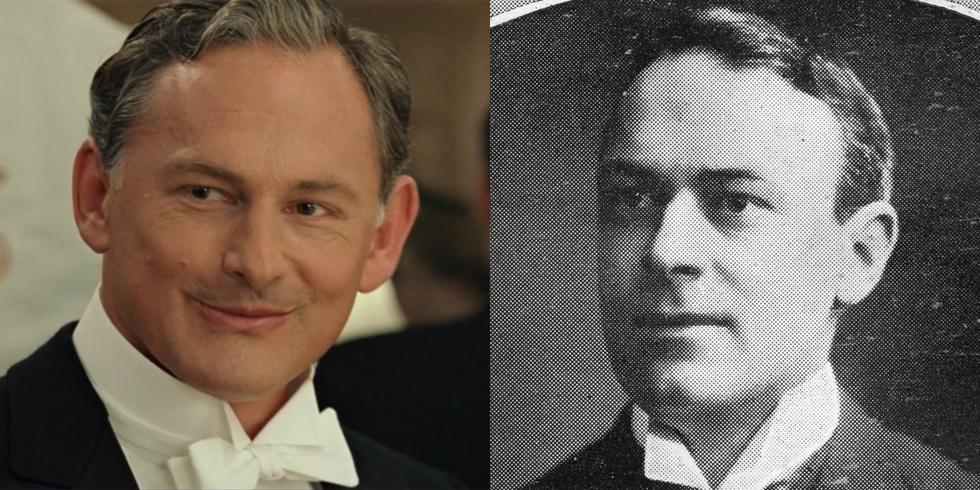
* __Thomas Andrews__

Interpretado por Victor Garber, Thomas Andrews foi o designer e construtor no comando do Titanic.

In [211]:
complete.loc[complete.Name.str.contains('Andrews, Mr. Thomas Jr')]

PassengerId  Survived       Pclass  Sex   Age  SibSp  Parch  \
806          807       0.0  First Class  Men  39.0      0      0   

     Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_rare  FamilySize  \
806             0           0         1          0           0           1   

     IsAlone  FareLabel  Embarked_C  Embarked_Q  Embarked_S  StageLife  \
806        1        0.0           0           0           1        4.0   

     SevenYears Cabin Embarked  Fare                    Name  Ticket  
806         5.0   A36        S   0.0  Andrews, Mr. Thomas Jr  112050